# Exploratory Data Analysis

In this notebook, we are going to anaylze the data. With the help of this analysis I will have a better understanding of my listening taste.

In [2]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import calplot
sns.set()

# 1. My Streaming History

In this section, I am going to analyse my behaviour and personality with the help of my music listening history. Here I am using my spotify listening history. I first started using spotify in 2019 and still continue to listen songs on it. Hence in the past 2 year I have generated a huge amount of data which will be enough for analysis. 

In [3]:
# reading the dataset in dataframe
my_streaming = pd.read_csv('data\mohit_song_data.csv')
my_streaming = my_streaming.drop(columns=['Unnamed: 0'])
my_streaming.head(3)

artistName        trackName  msPlayed             datetime  \
0         Kalandra      Slow Motion    319292  2022-05-11 00:59:00   
1  Storm Corrosion  Storm Corrosion    505432  2022-05-11 01:07:00   
2   ChrisNa Karast            SHIVA    389400  2022-05-11 01:14:00   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.713   0.734  0.0    -4.894   0.0       0.3250         0.548   
1         0.303   0.175  9.0   -20.261   0.0       0.0357         0.832   
2         0.653   0.849  2.0    -7.889   1.0       0.0308         0.100   

   instrumentalness  liveness  valence    tempo                      id  \
0            0.0000    0.0687   0.8900  172.872  6ihObRBTB8xdSH2mlERtOX   
1            0.8650    0.3440   0.0947  119.786  4h6cvOxiHOgNJRir4R0en2   
2            0.0642    0.0619   0.4860  122.987  3L578QAFtaXYuRz0gmoVei   

   time_signature  
0             4.0  
1             4.0  
2             4.0

## How often did I listened music?

In this visualization, I will determine that everday for how long I used to listen to music. This plot is similar to a plot on github which shows us the number of commits we make everyday, but, here I will be showing the amount time (in minutes) I listened to music.

In [4]:
# converting ms to minute and extracting date from datetime column
my_streaming['mins_played'] = my_streaming.apply(lambda x: round(x['msPlayed']/60000,2), axis=1)
my_streaming['date'] = my_streaming.apply(lambda x: pd.to_datetime(x['datetime'][:10],format='%Y-%m-%d'),axis=1)

# calculate the daily streaming time length 
daily_length = my_streaming.groupby('date',as_index=True).sum()

In [5]:
# create new date series for displaying time series data
idx = pd.DataFrame(pd.date_range(min(my_streaming.date), max(my_streaming.date)),columns=['date'])
idx['date'] = idx.apply(lambda x: pd.to_datetime(x['date'],format='%Y-%m-%d'),axis=1)

# use new date series to display the daily streaming time
new_daily_length = pd.merge(idx, daily_length, how='left', left_on='date', right_on = 'date', copy=False)
new_daily_length.head(3)

date                                         artistName  \
0 2022-05-11  KalandraStorm CorrosionChrisNa KarastWilliam O...   
1 2022-05-12  The KnocksODESZATychoTychoTychoTychoTychoTycho...   
2 2022-05-13  Anushka ManchandaAnushka ManchandaSusheela Ram...   

                                           trackName  msPlayed  \
0  Slow MotionStorm CorrosionSHIVAWater From A Vi...   8014246   
1  Bodies - Tycho RemixAcross The Room - Tycho Re...  17593990   
2  Welcome To HollywoodWelcome To HollywoodWhat S...  48704720   

                                            datetime  danceability     energy  \
0  2022-05-11 00:59:002022-05-11 01:07:002022-05-...        27.318   25.34645   
1  2022-05-12 03:12:002022-05-12 03:16:002022-05-...        80.834   76.22360   
2  2022-05-13 00:09:002022-05-13 00:25:002022-05-...       134.913  118.90162   

      key  loudness   mode  speechiness  acousticness  instrumentalness  \
0   189.0  -894.233   29.0       4.2291     25.358850         37.669179   
1   769.0 -1360.500   61.0       7.8882     48.610169         58.535563   
2  1229.0 -2445.323  121.0      16.2756     79.789439         84.344428   

   liveness  valence      tempo  \
0    8.4294  10.9898   6397.678   
1   24.7812  50.5912  15799.971   
2   37.1598  86.4333  27116.100   

                                                  id  time_signature  \
0  6ihObRBTB8xdSH2mlERtOX4h6cvOxiHOgNJRir4R0en23L...           212.0   
1  5bxaTlZQRbFTTxV72ws1d71nzLNeyk835Q9h1zPS4gr90z...           529.0   
2  0dGe1ng5b3j7DPiUsMtVEu0dGe1ng5b3j7DPiUsMtVEu5p...           880.0   

   mins_played  
0       133.57  
1       293.28  
2       811.69

In [6]:
# getting rid of columns except for date and time
new_daily_length = new_daily_length.drop(new_daily_length.loc[:, 'artistName':'time_signature'], axis=1)

# setting date as index
new_daily_length.index = new_daily_length.date

new_daily_length = new_daily_length.drop(columns=['date'])
new_daily_length.head(3)

mins_played
date                   
2022-05-11       133.57
2022-05-12       293.28
2022-05-13       811.69

In [7]:
# converting the dataframe into series for calplot
new_daily_length = new_daily_length.squeeze()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 2000x1000 with 3 Axes>,
 array([<Axes: ylabel='2022'>, <Axes: ylabel='2023'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


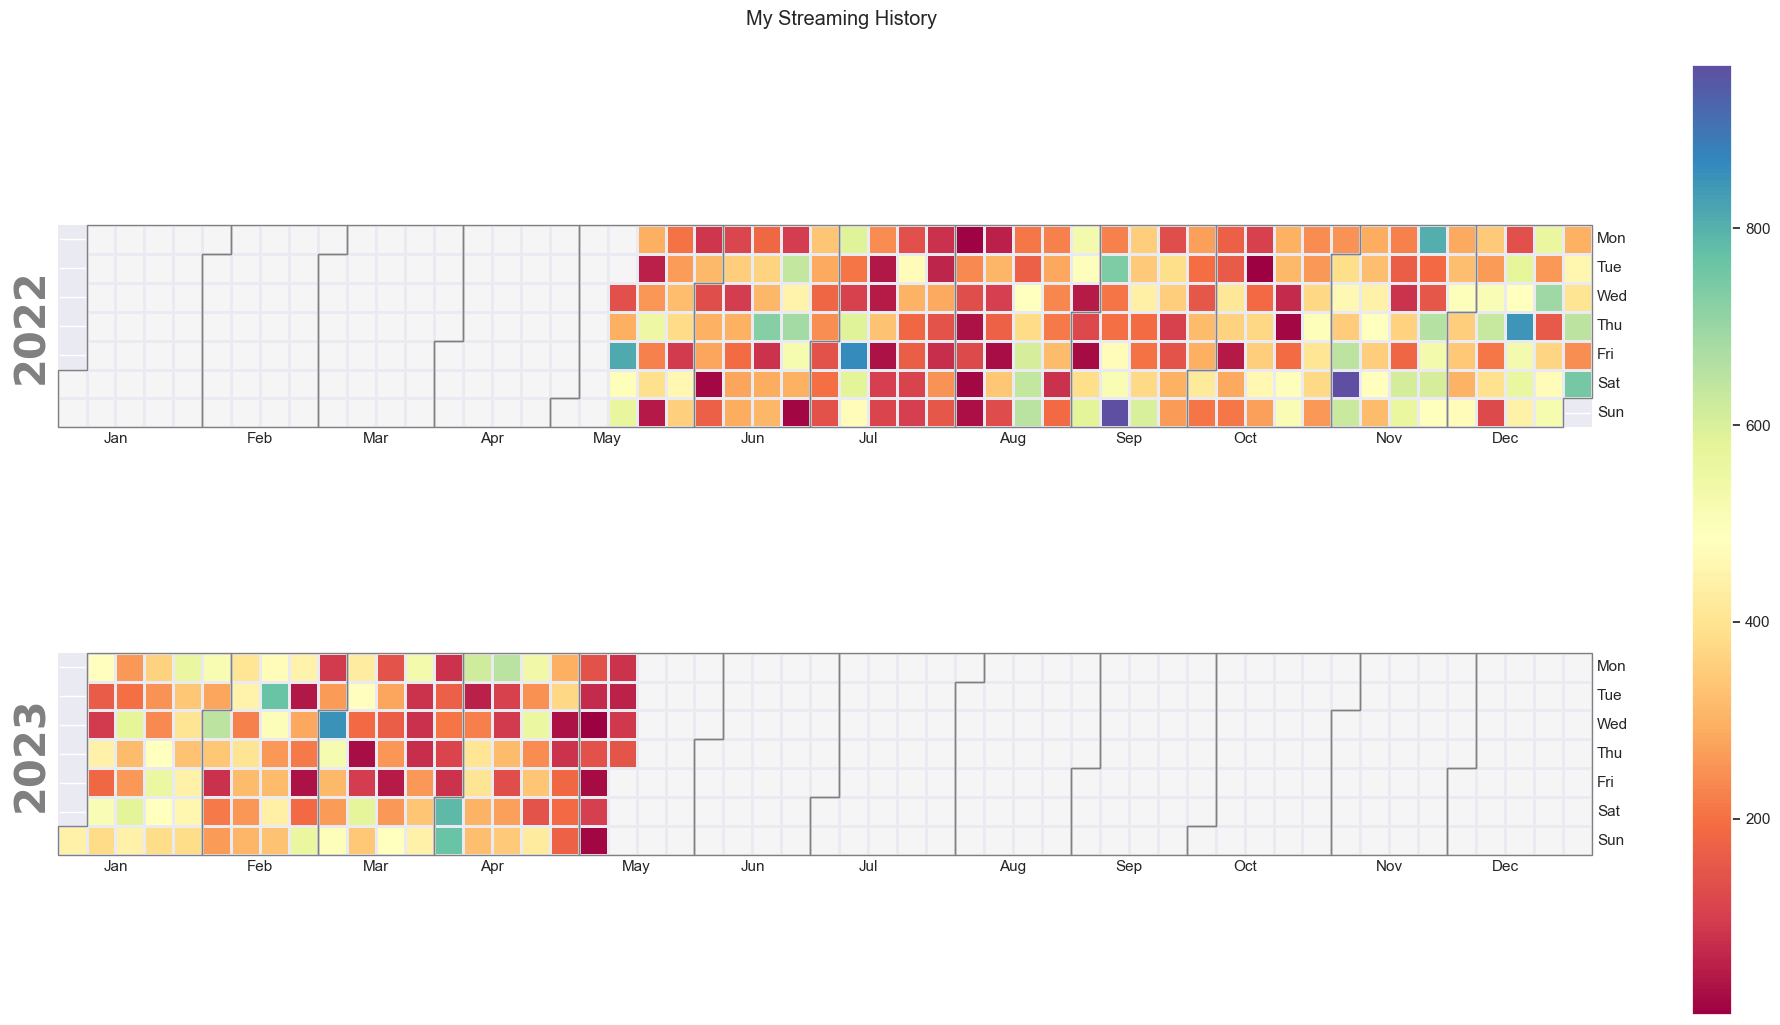

In [8]:
calplot.calplot(new_daily_length, figsize=(20,10), suptitle='My Streaming History', cmap='Spectral' )

I listen to music everyday when I used to travel to my college. As per the graph, everyday I used to listen to songs from 5-80 mins. However, there were days when I listened to music for more than 100 mins as well. Morover, many days I never listened to music as well, this is probably because I might be late for my college and I never had the time to plug in. Then since April 2020 lockdown was imposed, and at home I listened for less amount of time (approx less than 30 minutes). However, there were a few days when I would listen for more than an hour.

## Whom did I listened to most?

Here I will be plotting a graph to determine my most heard artist in this past year. 

In [9]:
my_streaming.head(2)
my_streaming.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32794 entries, 0 to 32793
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   artistName        32794 non-null  object        
 1   trackName         32794 non-null  object        
 2   msPlayed          32794 non-null  int64         
 3   datetime          32794 non-null  object        
 4   danceability      32794 non-null  float64       
 5   energy            32794 non-null  float64       
 6   key               32794 non-null  float64       
 7   loudness          32794 non-null  float64       
 8   mode              32794 non-null  float64       
 9   speechiness       32794 non-null  float64       
 10  acousticness      32794 non-null  float64       
 11  instrumentalness  32794 non-null  float64       
 12  liveness          32794 non-null  float64       
 13  valence           32794 non-null  float64       
 14  tempo             3279

In [10]:
# grouping the dataset as per artist name and counting the songs per artist
#artist_length = my_streaming.groupby('artistName',as_index=False).sum()
artist_length = my_streaming.groupby('artistName', as_index=False).sum(numeric_only=True)

artist_song_cnt = my_streaming.groupby('artistName',as_index=False).agg({"trackName": "nunique"})

In [11]:
# merge artist_length and artist_song_cnt 
artist_length_uniqsong = pd.merge(artist_length,artist_song_cnt,how='left',on='artistName',copy=False)
artist_length_uniqsong.rename(columns={'trackName':'unique_track_number'},inplace=True)
artist_length_uniqsong.head(3)

artistName  msPlayed  danceability  energy   key  loudness  mode  \
0  ((( O )))     19281         0.608   0.411   3.0   -10.070   1.0   
1       16BL   4050176        12.438   9.450  90.0  -101.754   0.0   
2    2 bucks    111000         0.730   0.688  11.0    -9.043   0.0   

   speechiness  acousticness  instrumentalness  liveness  valence     tempo  \
0       0.0344        0.8980             0.912    0.1540    0.104   149.979   
1       1.0728        0.4338             0.000    4.7700   12.708  1889.784   
2       0.0488        0.6290             0.468    0.0691    0.232   149.960   

   time_signature  mins_played  unique_track_number  
0             4.0         0.32                    1  
1            72.0        67.51                    1  
2             3.0         1.85                    1

In [12]:
max_time  = artist_length_uniqsong.sort_values(by=['mins_played'])
max_time.tail()

artistName   msPlayed  danceability      energy     key   loudness  \
2188       Samskara  165647426      339.3230  554.714000  2447.0  -7036.295   
2209    Sattyananda  243851440      522.1092  346.717483  4112.0 -17073.562   
2672           U108  245888000      593.4132  564.580920  3795.0 -10415.629   
2263  Shanti People  272974609      635.7200  803.210000  6737.0  -7895.157   
2379     Stan Kolev  378993767      847.3618  729.453100  6503.0 -12080.424   

       mode  speechiness  acousticness  instrumentalness  liveness   valence  \
2188  617.0      38.1419     91.000996        409.715260  197.2840  155.0698   
2209  702.0      46.7943    280.638130        668.038872  129.2949   68.0481   
2672  660.0      66.6453    214.347379        584.567697  131.9866  145.9895   
2263  589.0      77.0029    115.653936        134.898657  168.6033  358.2149   
2379  635.0      77.9215     54.063961        951.294258  151.5547  502.5195   

           tempo  time_signature  mins_played  unique_track_number  
2188   83354.959          2982.0      2760.28                    7  
2209  117098.985          3555.0      4063.99                   54  
2672  118838.941          3519.0      4099.16                   23  
2263  143555.767          4333.0      4550.12                   42  
2379  142891.095          4627.0      6317.05                   97

In [13]:
# top 30 artist I listen to (tail because the df is in ascending order of count of minutes)
most_heard_30 = max_time.tail(30)

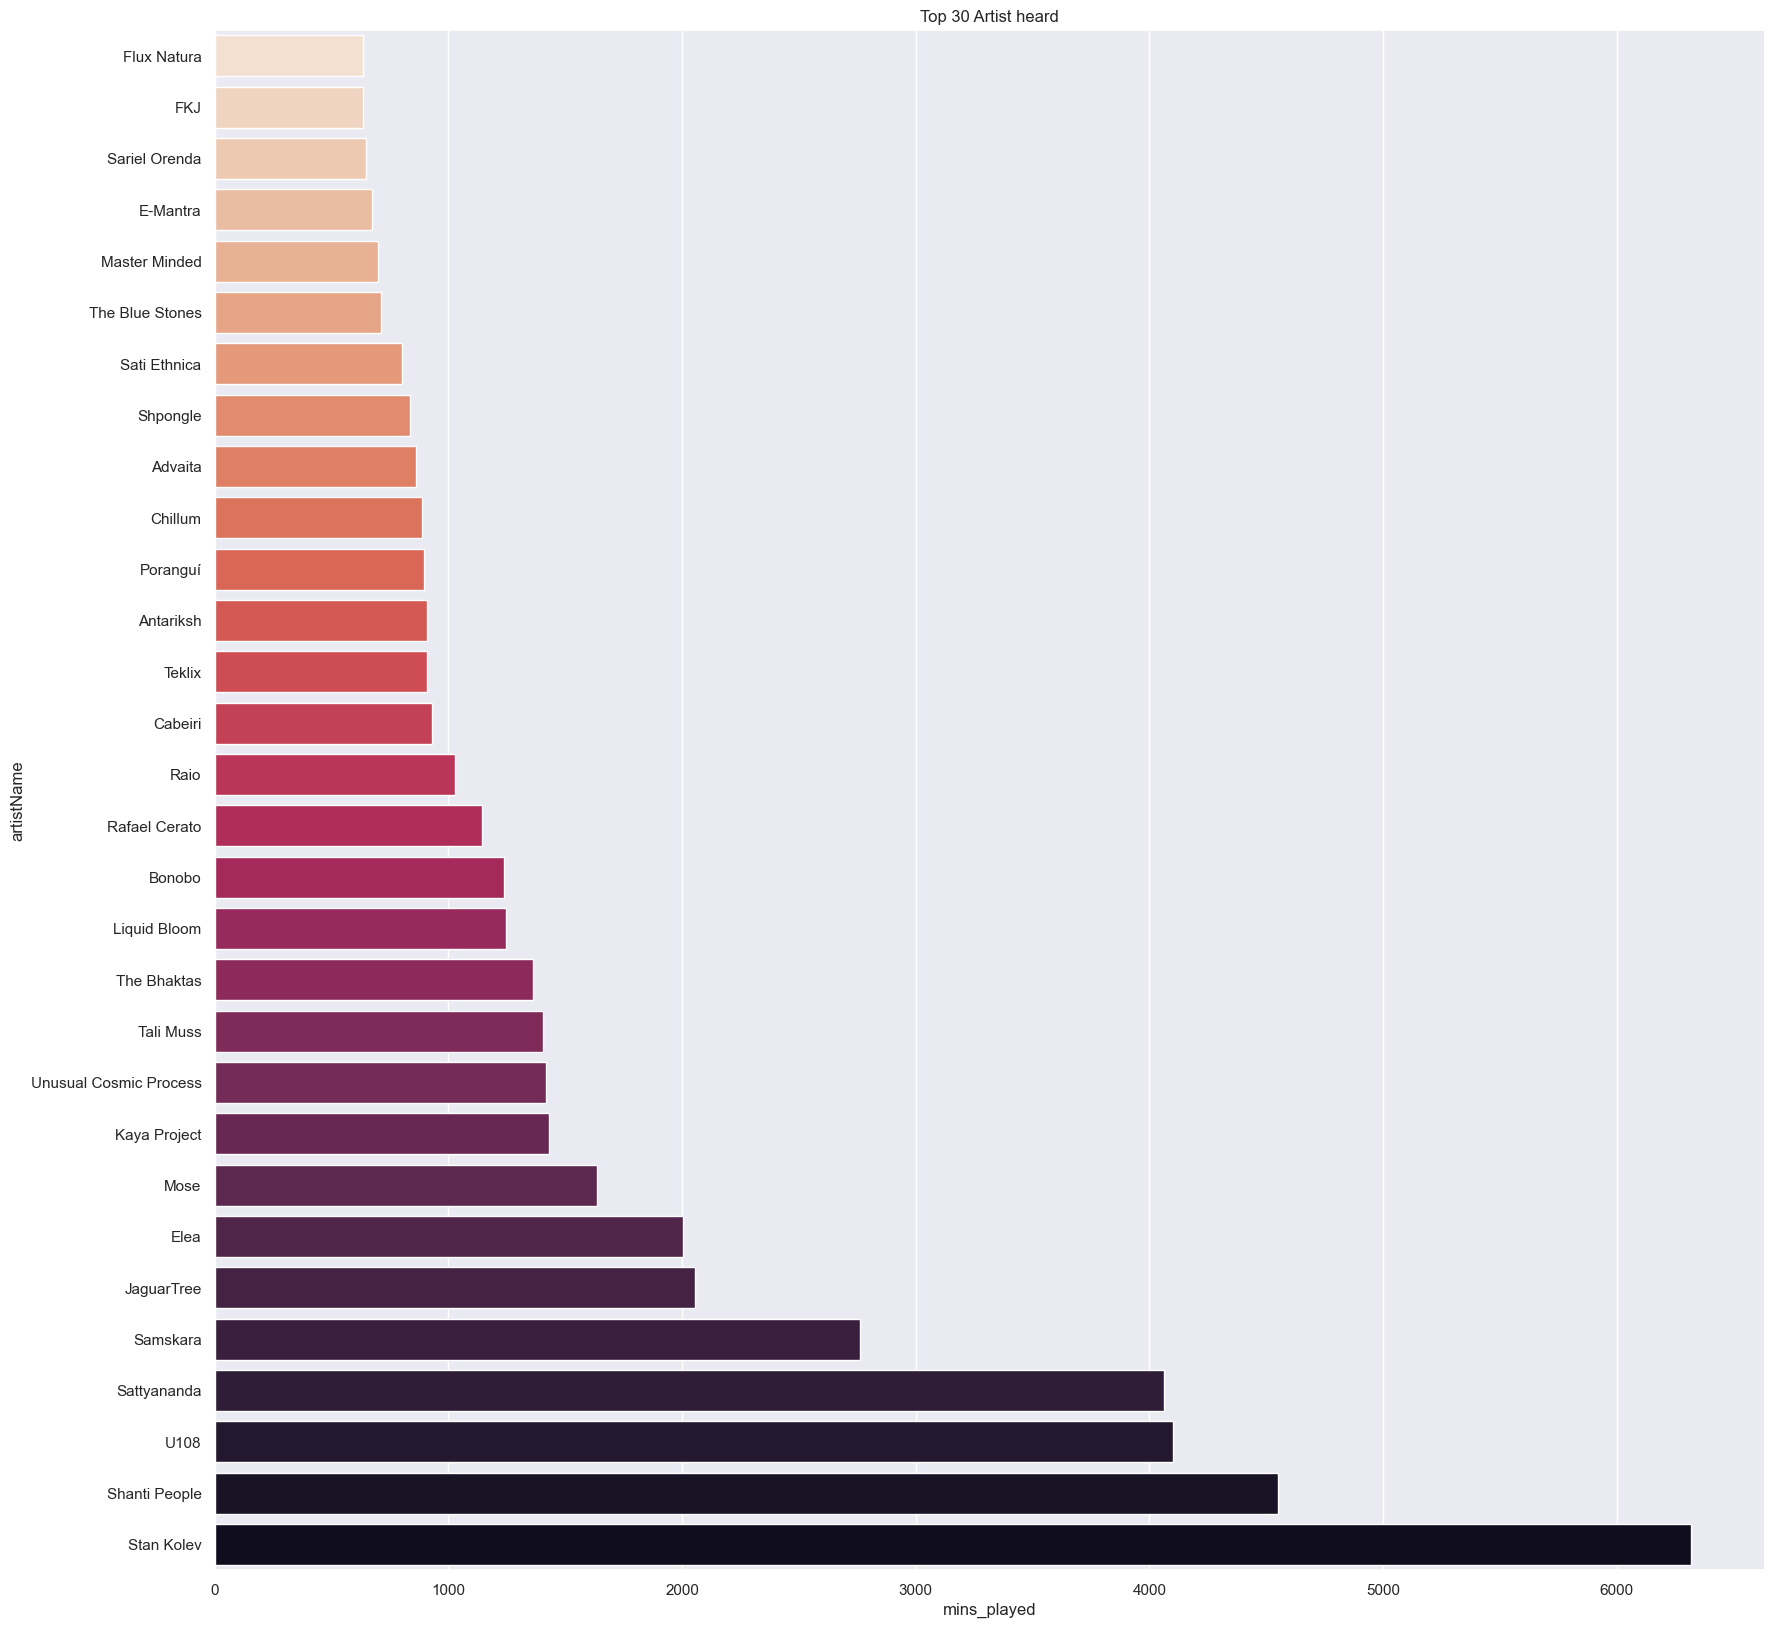

In [14]:
# barplot artist vs minutes_played
plt.rcParams["figure.figsize"] = (20,20)
sns.barplot(y = most_heard_30['artistName'], x = most_heard_30['mins_played'], palette='rocket_r')
plt.title('Top 30 Artist heard')
plt.show()

Since the bar graph could only show 30 artist clearly. In the next plot, I have made a word cloud, where I am representing my top 100 artists  with no compromise in clarity.

In [15]:
# converted df to dict
artist_freq = dict(zip(artist_length_uniqsong['artistName'].tolist(), artist_length_uniqsong['mins_played'].tolist()))

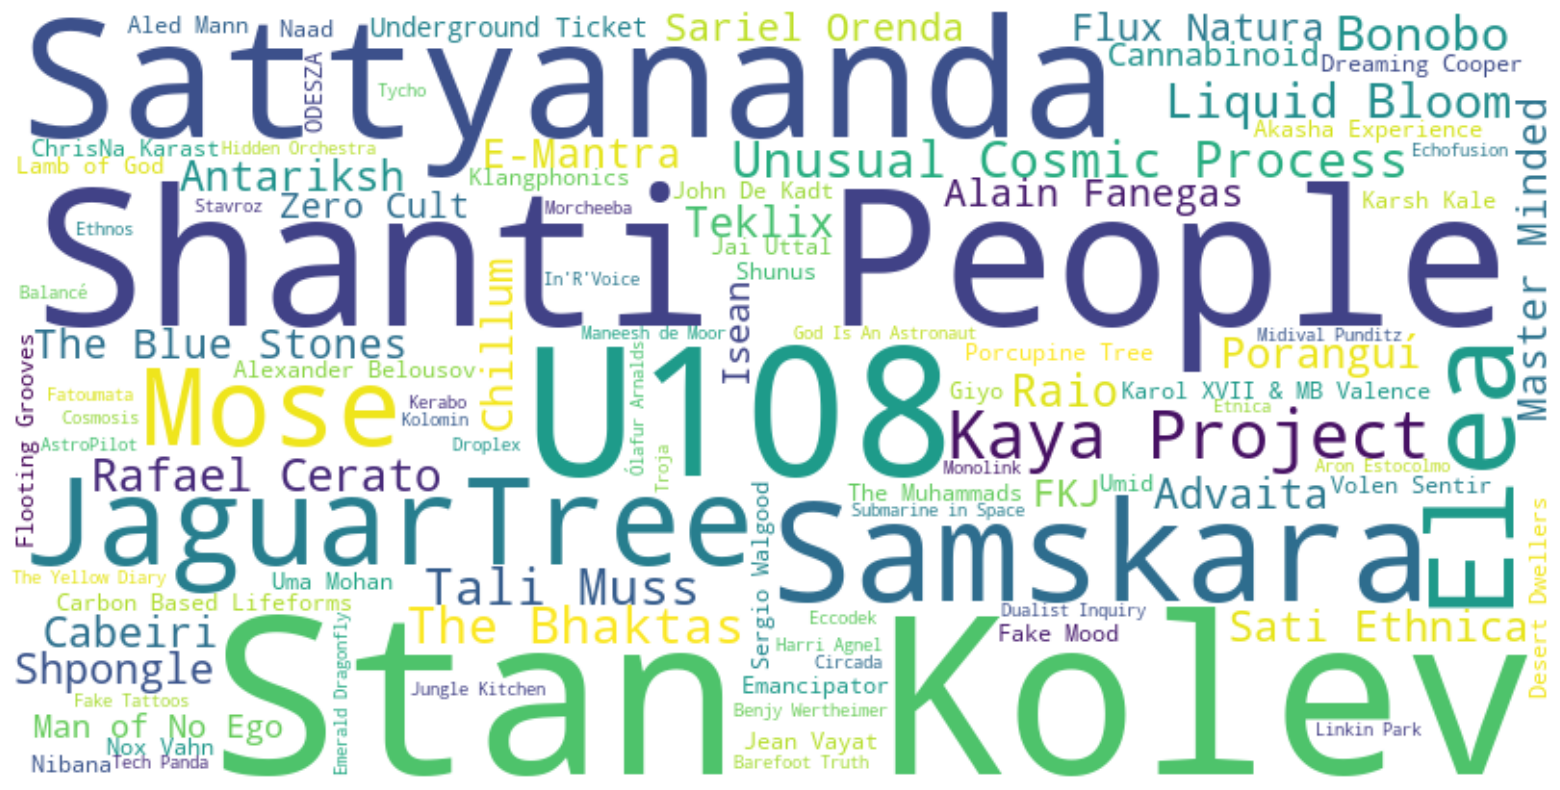

In [16]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white',width=800, height=400, max_words=100).generate_from_frequencies(artist_freq)
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

As you can see in the  above graph, the bigger the artist the name, the most I listened to the artist. Moreover, this plot easily inculacate 100 artists.

Let's look at the list of artists for whom I have listened the minimum of 5 songs.

In [17]:
max_songs = artist_length_uniqsong.loc[artist_length_uniqsong['unique_track_number'] > 5]

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from current font.
  func(*args, **kwargs)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


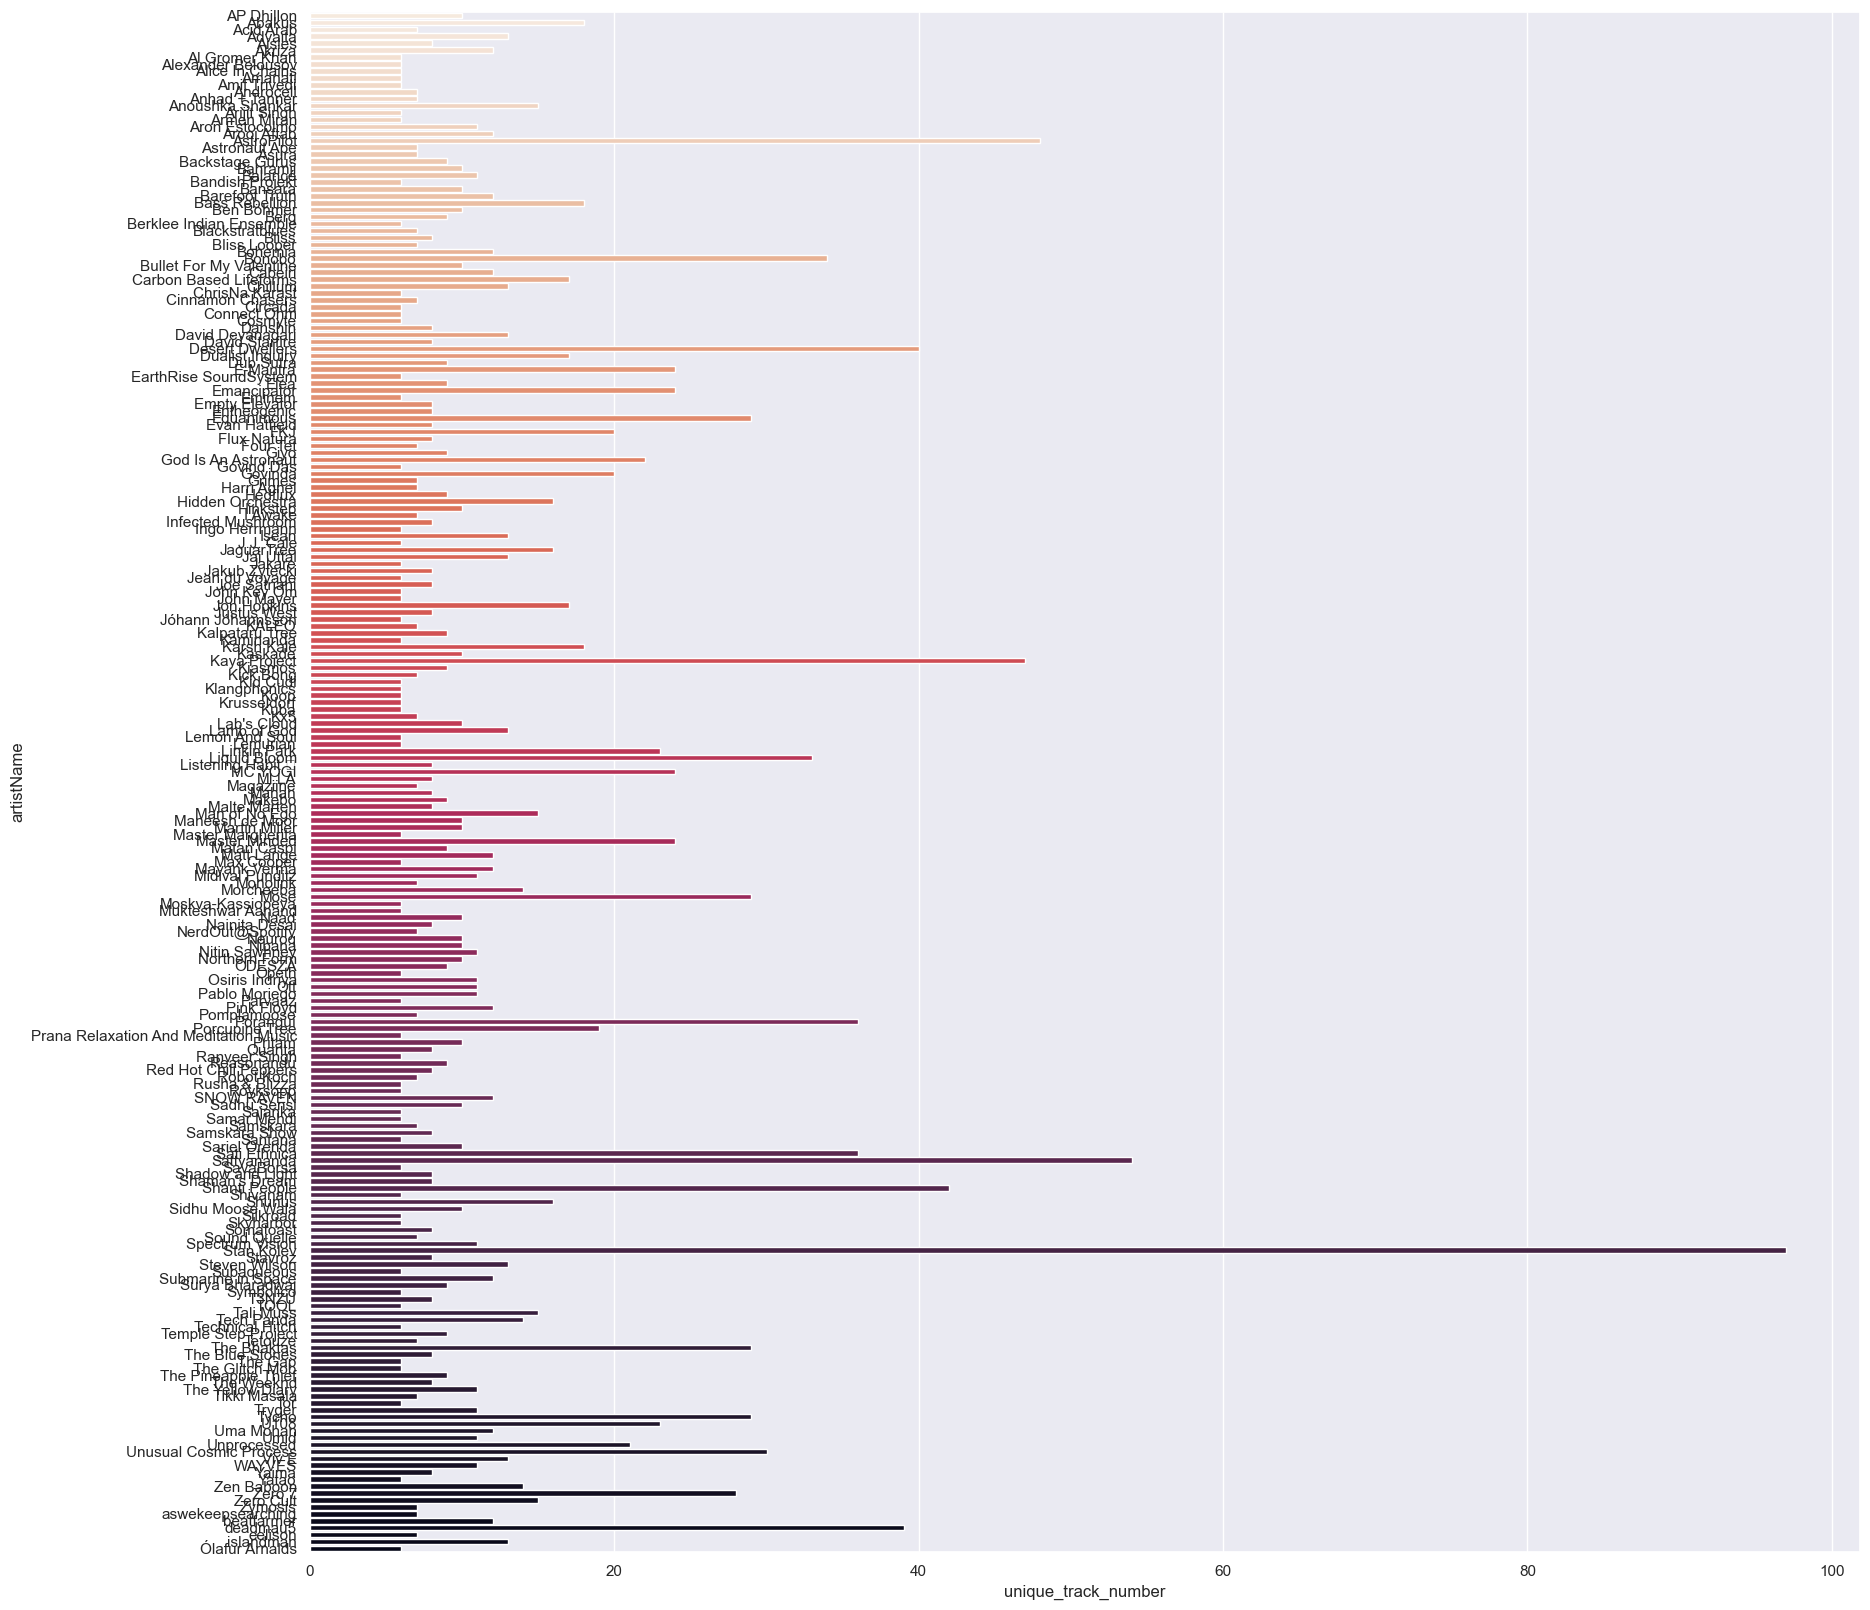

In [18]:
sns.barplot(y = max_songs['artistName'], x = max_songs['unique_track_number'], palette='rocket_r')
plt.rcParams["figure.figsize"] = (20,20)

## My mood throughout the year.

In [19]:
my_streaming.columns

Index(['artistName', 'trackName', 'msPlayed', 'datetime', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'id',
       'time_signature', 'mins_played', 'date'],
      dtype='object')

In [20]:
# create new date series for displaying time series data
idx = pd.DataFrame(pd.date_range(min(my_streaming.date), max(my_streaming.date)),columns=['date'])
idx['date'] = idx.apply(lambda x: pd.to_datetime(x['date'],format='%Y-%m-%d'),axis=1)

In [21]:
valence = my_streaming.groupby('date')['valence'].aggregate(['min', np.mean, 'max'])

In [22]:
val = pd.merge(idx, valence, how='left', left_on='date', right_on = 'date', copy=False).fillna(0)
val.head()

date     min      mean    max
0 2022-05-11  0.0174  0.196246  0.934
1 2022-05-12  0.0358  0.374750  0.935
2 2022-05-13  0.0312  0.385863  0.972
3 2022-05-14  0.0325  0.333018  0.965
4 2022-05-15  0.0206  0.461196  0.965

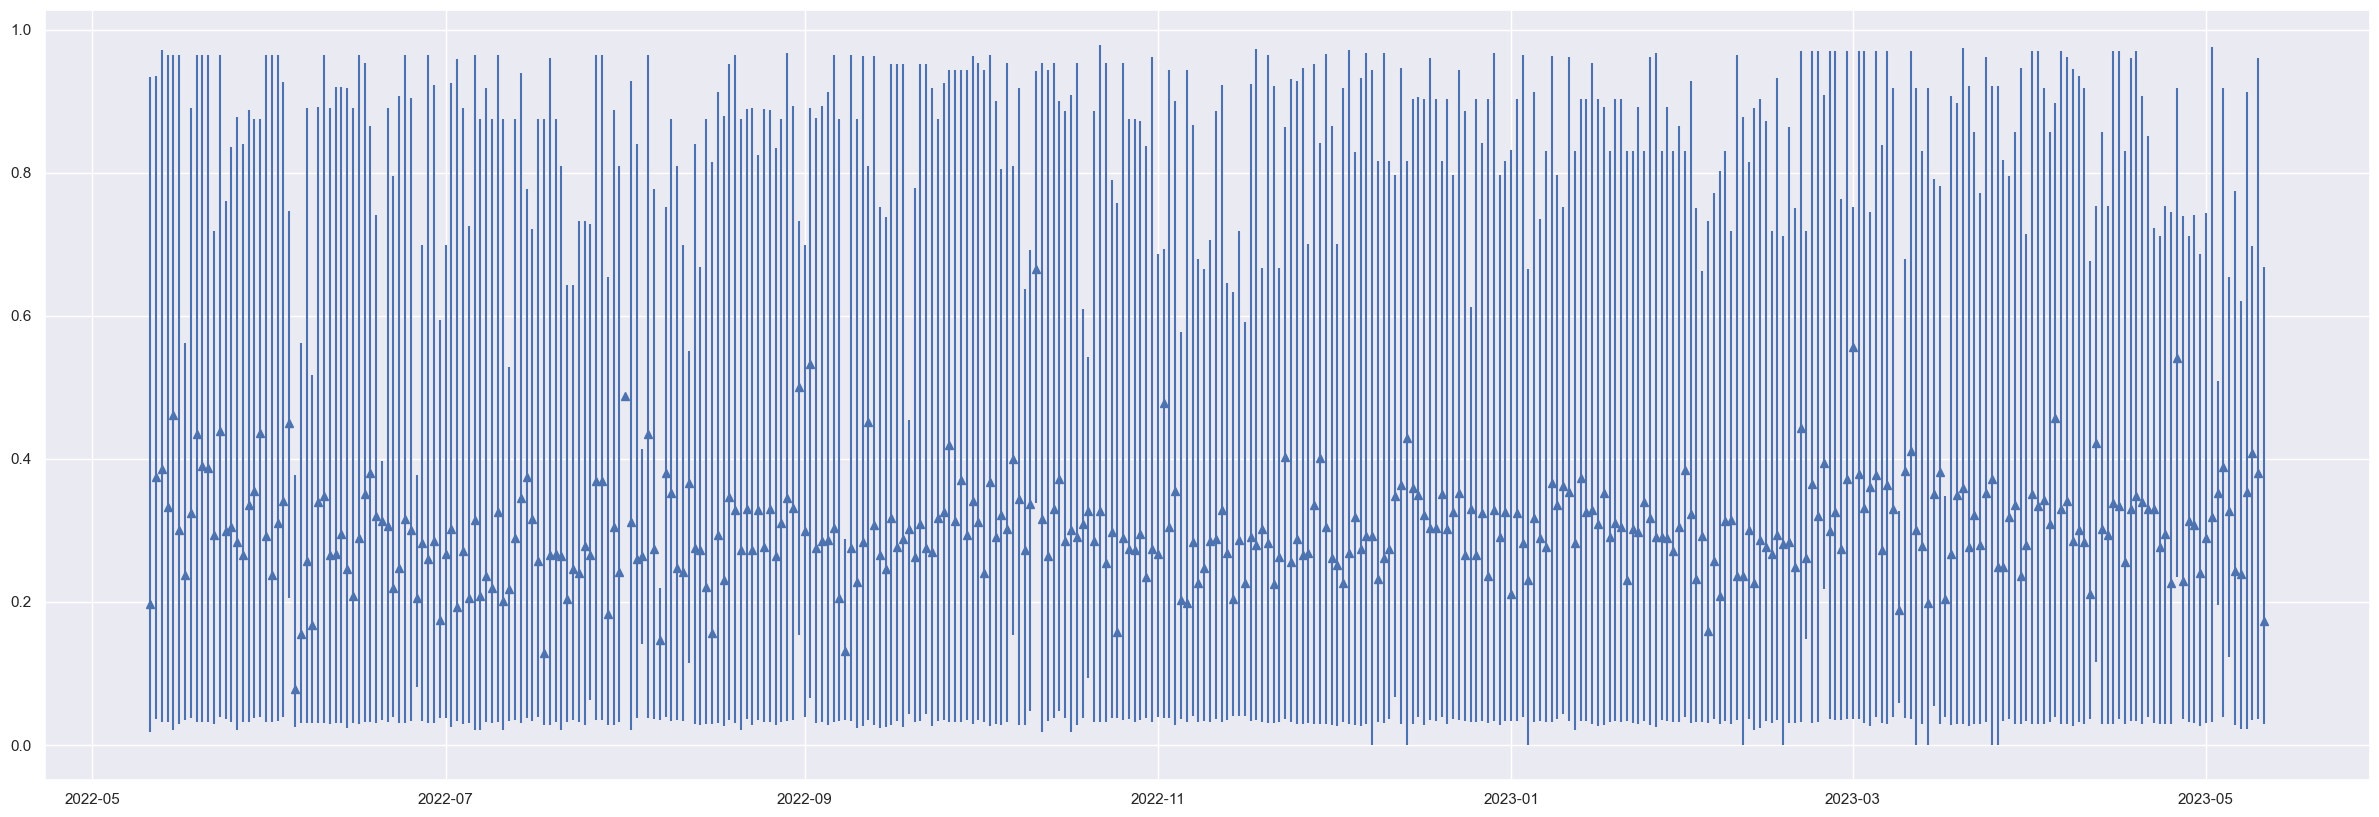

In [23]:
plt.rcParams["figure.figsize"] = (30,10)
plt.errorbar(val["date"],val["mean"], [val["mean"] - val['min'],val['max']-val["mean"]], linestyle='None',marker='^')
plt.show()

As you can see I listened to you all tpes of music be it a happy music or sad music.

Similarly, lets' plot a graph for dance and energy.

In [24]:
energy = my_streaming.groupby('date')['energy'].aggregate(['min', np.mean, 'max'])
dance = my_streaming.groupby('date')['danceability'].aggregate(['min', np.mean, 'max'])

In [25]:
d = pd.merge(idx, energy, how='left', left_on='date', right_on = 'date', copy=False).fillna(0)
e = pd.merge(idx, dance, how='left', left_on='date', right_on = 'date', copy=False).fillna(0)

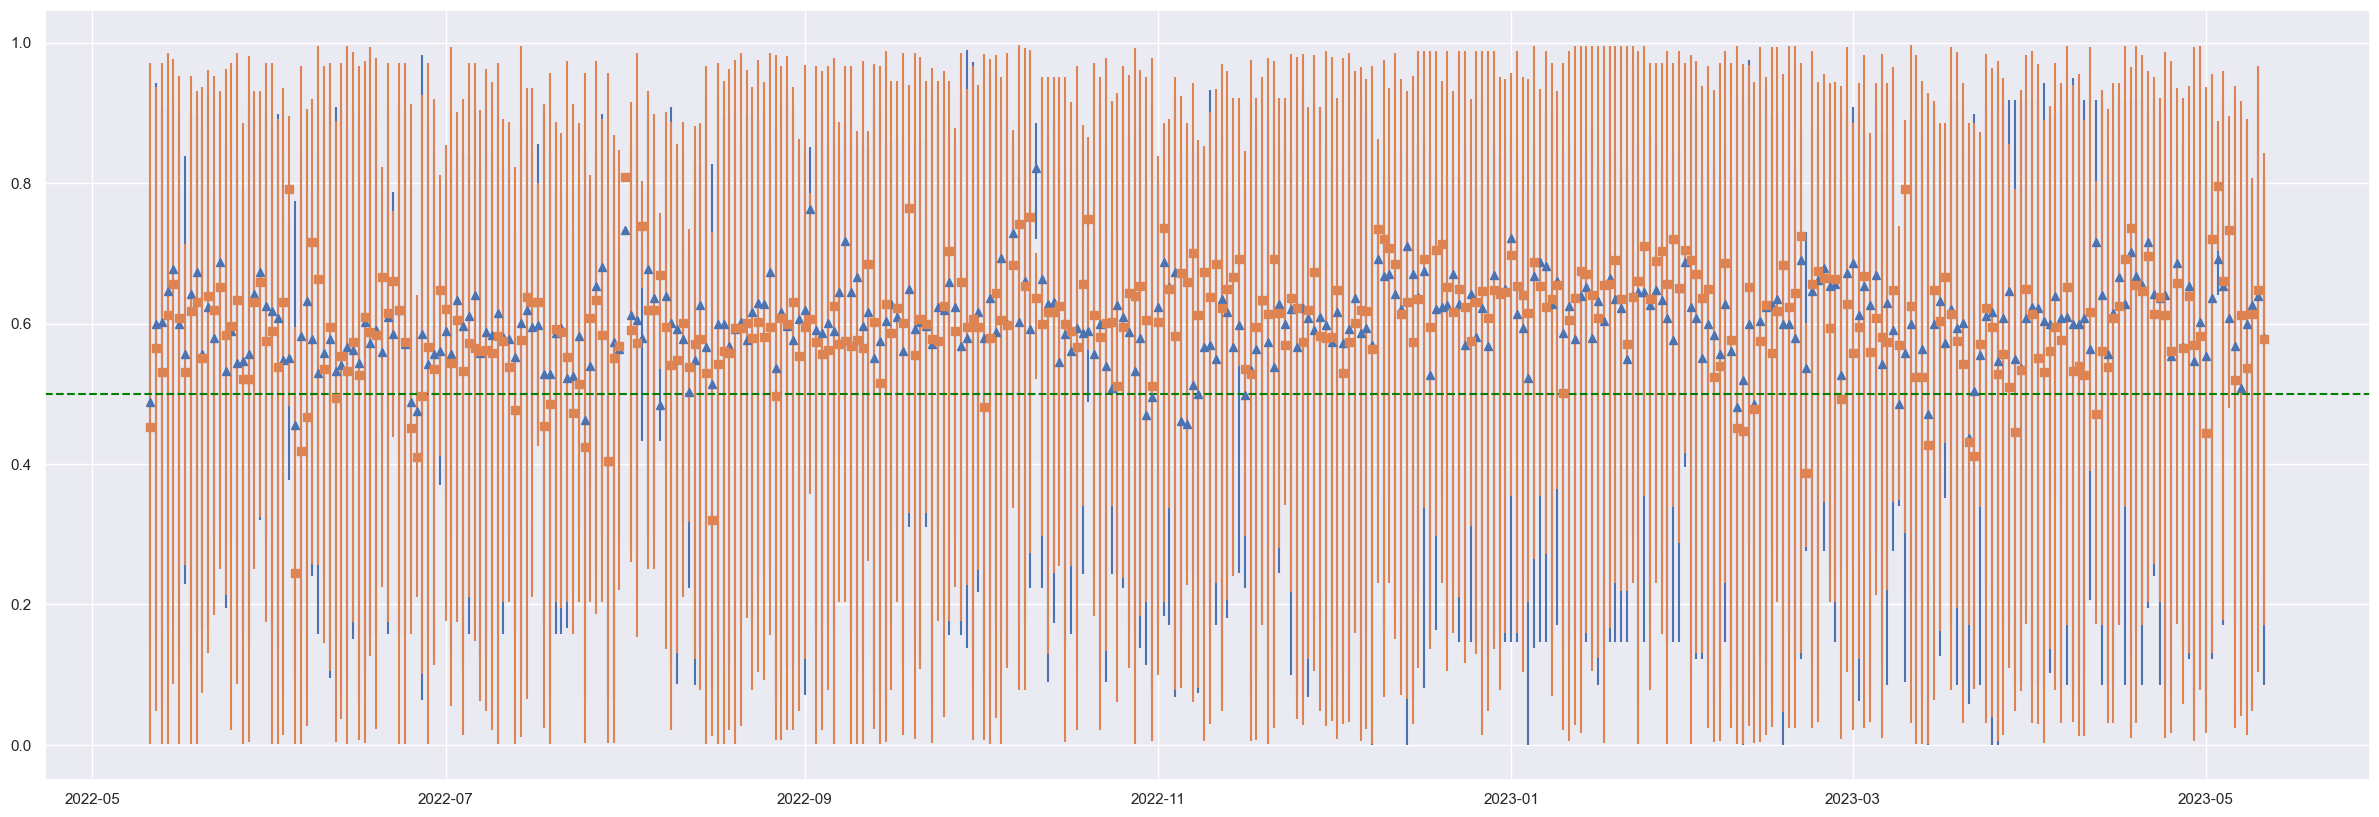

In [26]:
plt.rcParams["figure.figsize"] = (30,10)
plt.errorbar(e["date"],e["mean"], [e["mean"] - e['min'],e['max']-e["mean"]], linestyle='None',marker='^')
plt.errorbar(d["date"],d["mean"], [d["mean"] - d['min'],d['max']-d["mean"]], linestyle='None',marker='s')
plt.axhline(y=0.5, color='green', linestyle='dashed')
plt.show()

# 2. Feature Analysis

In this section, I will analyse the song features.

In [27]:
distinct_song = pd.read_csv('data\mohit_distinct_song.csv')
distinct_song = distinct_song.drop(columns=['Unnamed: 0'])

## Histogram

In [28]:
features = ['danceability', 'energy', 'key', 'loudness' ,'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','tempo']

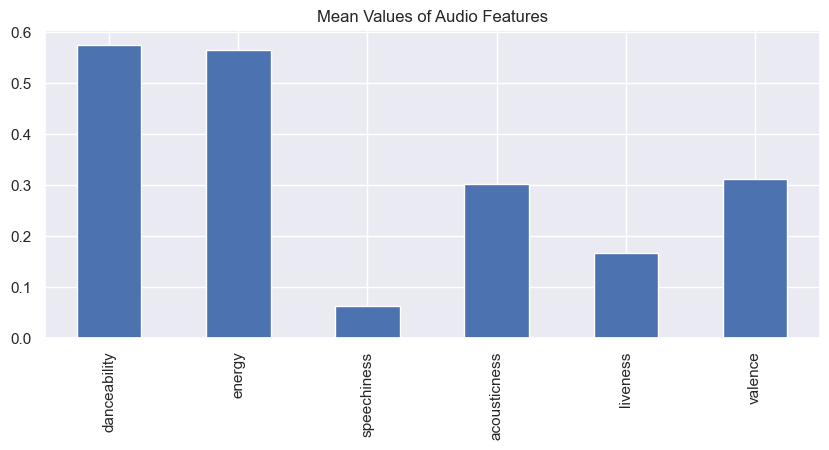

In [29]:
small = distinct_song[['danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence']]
plt.figure(figsize=(10,4))
small.mean().plot.bar()
plt.title('Mean Values of Audio Features')
plt.show()

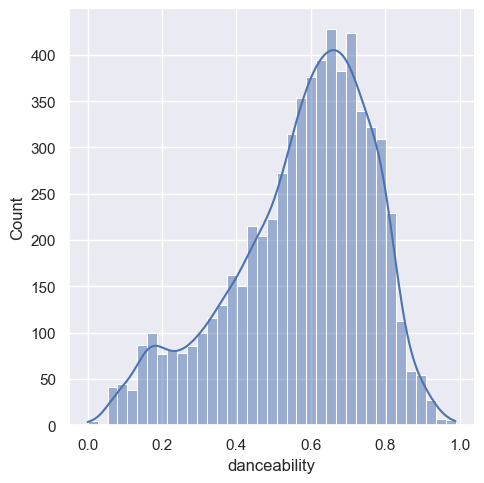

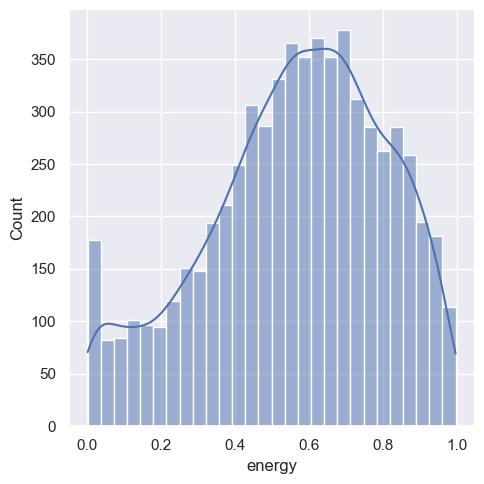

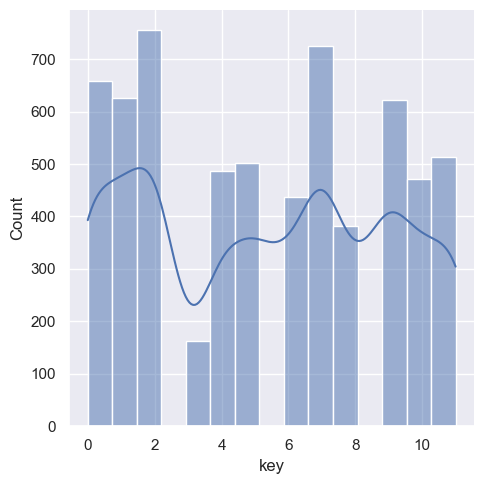

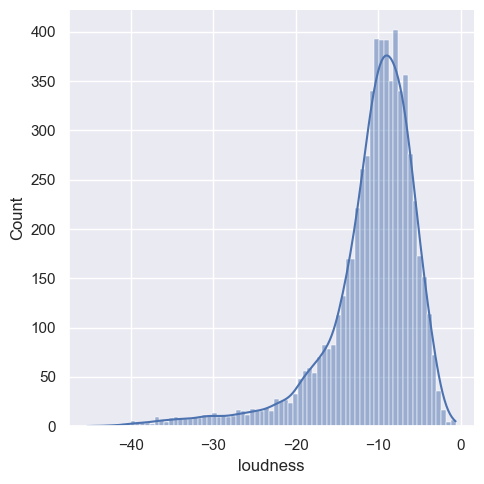

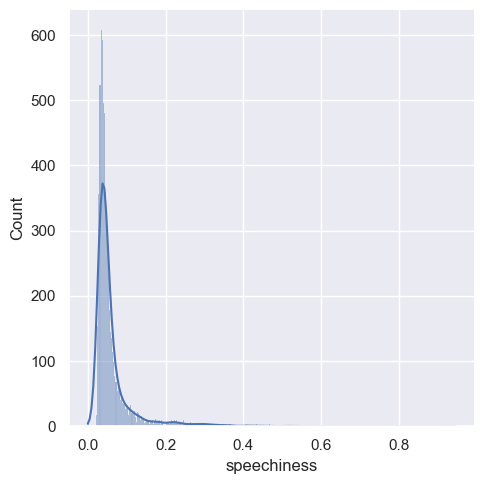

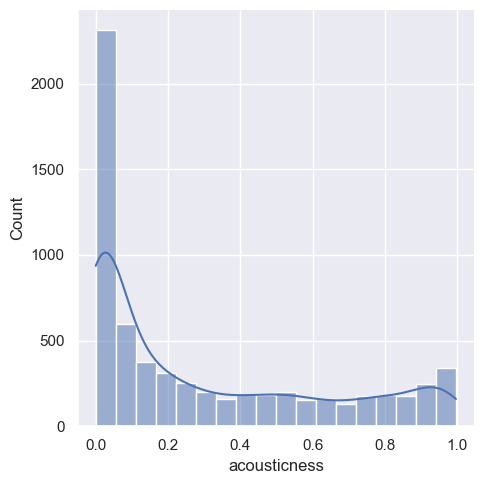

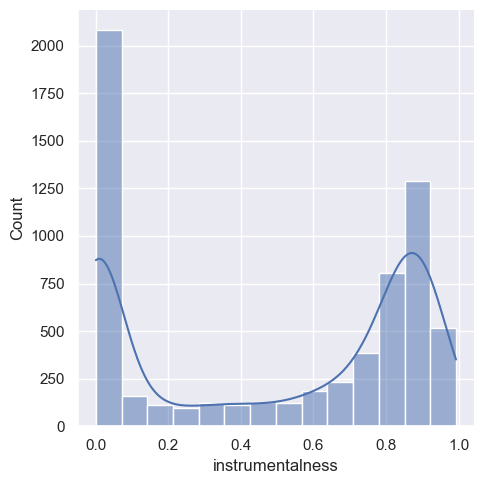

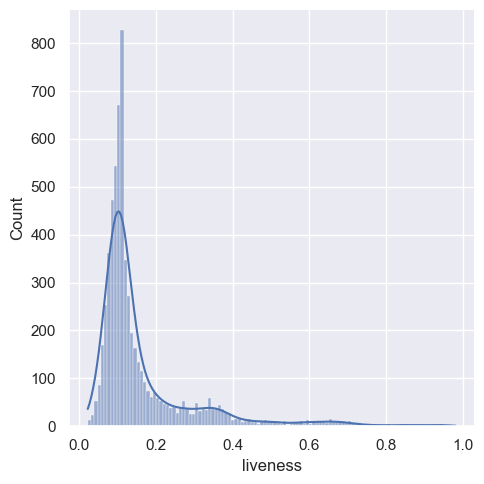

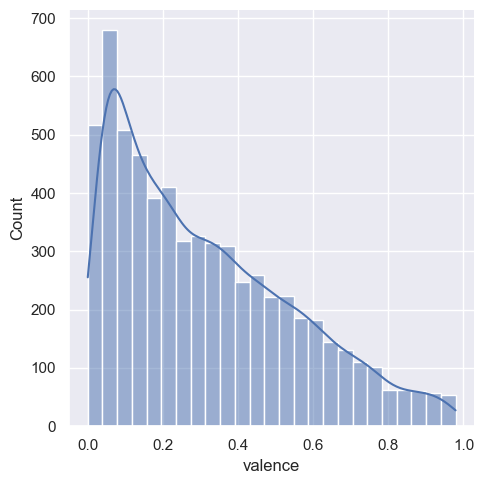

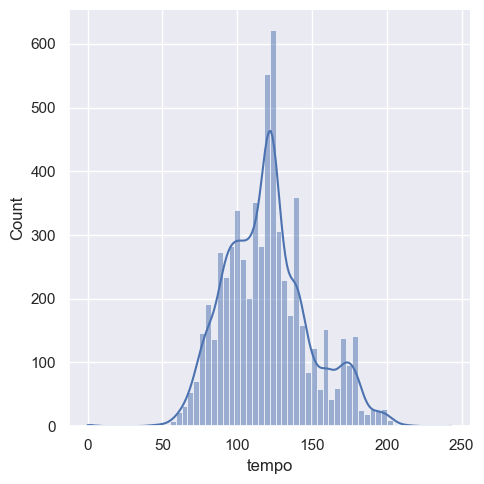

In [30]:
for col in features:
  sns.displot(distinct_song, x=col, kde=True)
  plt.show()

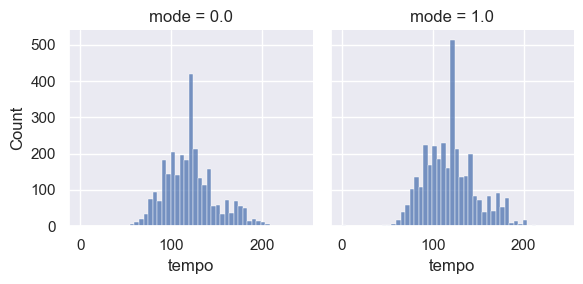

In [31]:
plt.rcParams['figure.figsize'] = (20,7)
g = sns.FacetGrid(distinct_song, col='mode')
g.map(sns.histplot, "tempo")
plt.show()

<Axes: xlabel='key', ylabel='count'>

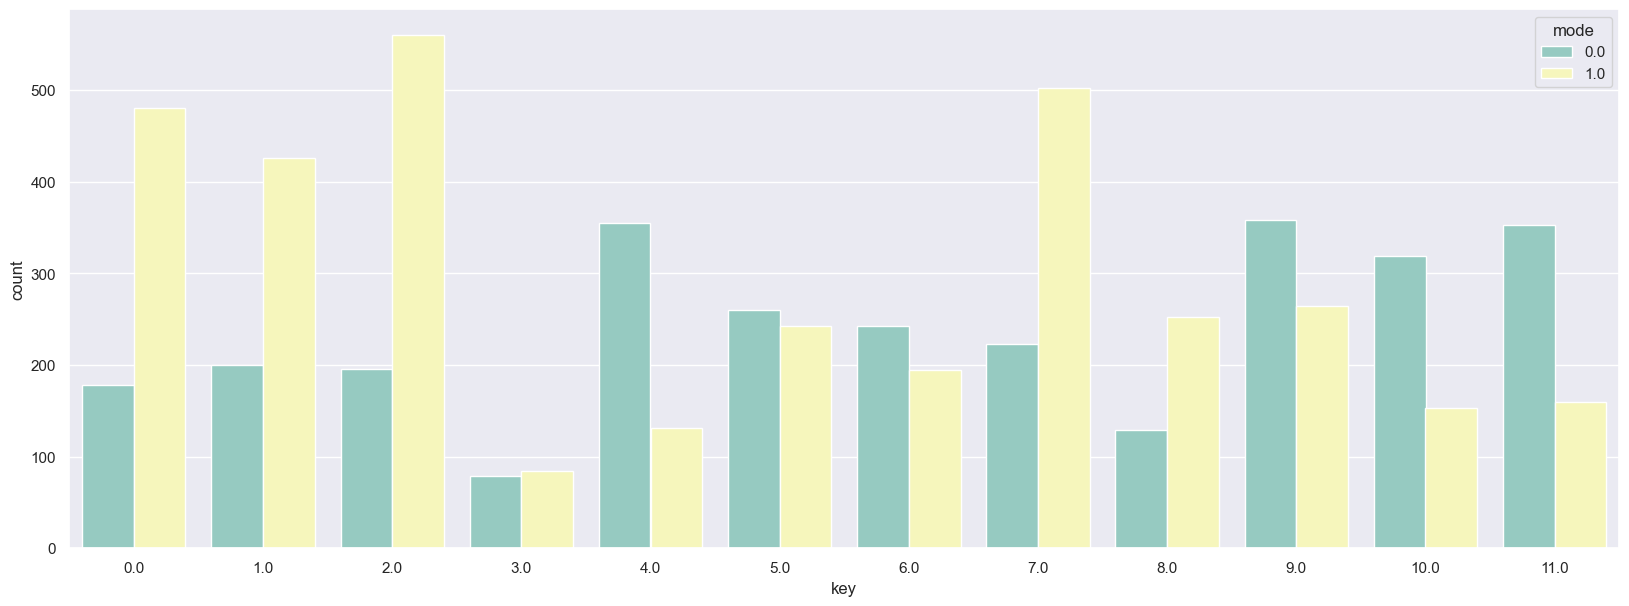

In [32]:
sns.countplot(data=distinct_song, x='key', hue='mode', palette = 'Set3')

## Heatmap

<Axes: >

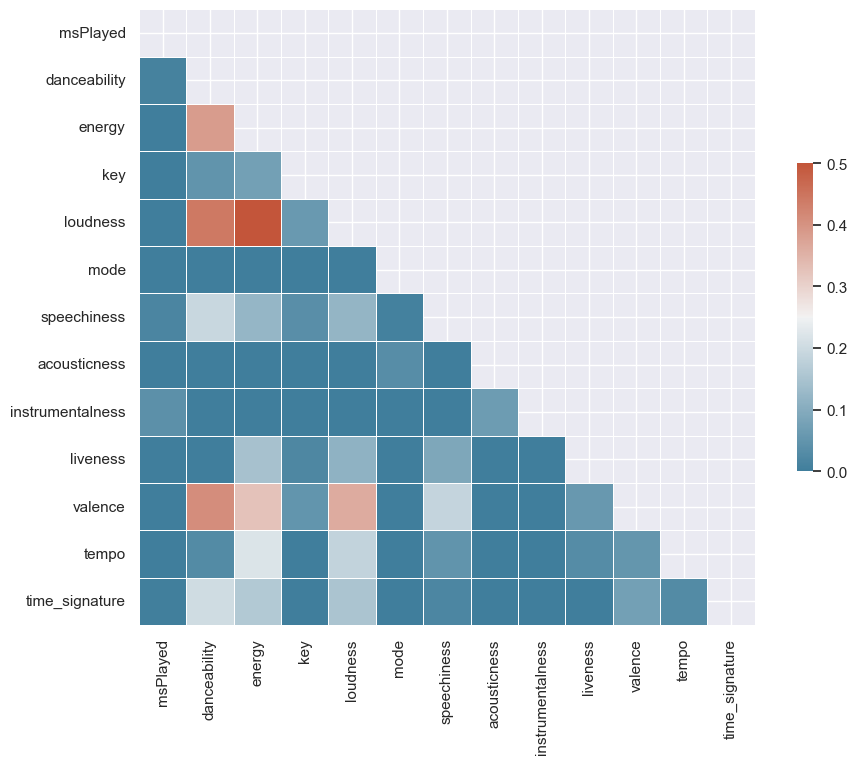

In [33]:
numeric_columns = distinct_song.select_dtypes(include=[np.number]).columns
correlation_matrix = distinct_song[numeric_columns].corr()
# Generate a mask for the upper triangle
#   mask = np.triu(np.ones_like(distinct_song.corr(), dtype=bool))

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(distinct_song.corr(), mask=mask, cmap=cmap, vmin=0, vmax=.5, 
           # square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmin=0, vmax=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the heatmap we can see that there is a huge correlation between:
- loudness X energy
- valence X danceability
- valence X energy
- valence X loudness
- energy X time_signature

<Axes: xlabel='danceability', ylabel='tempo'>

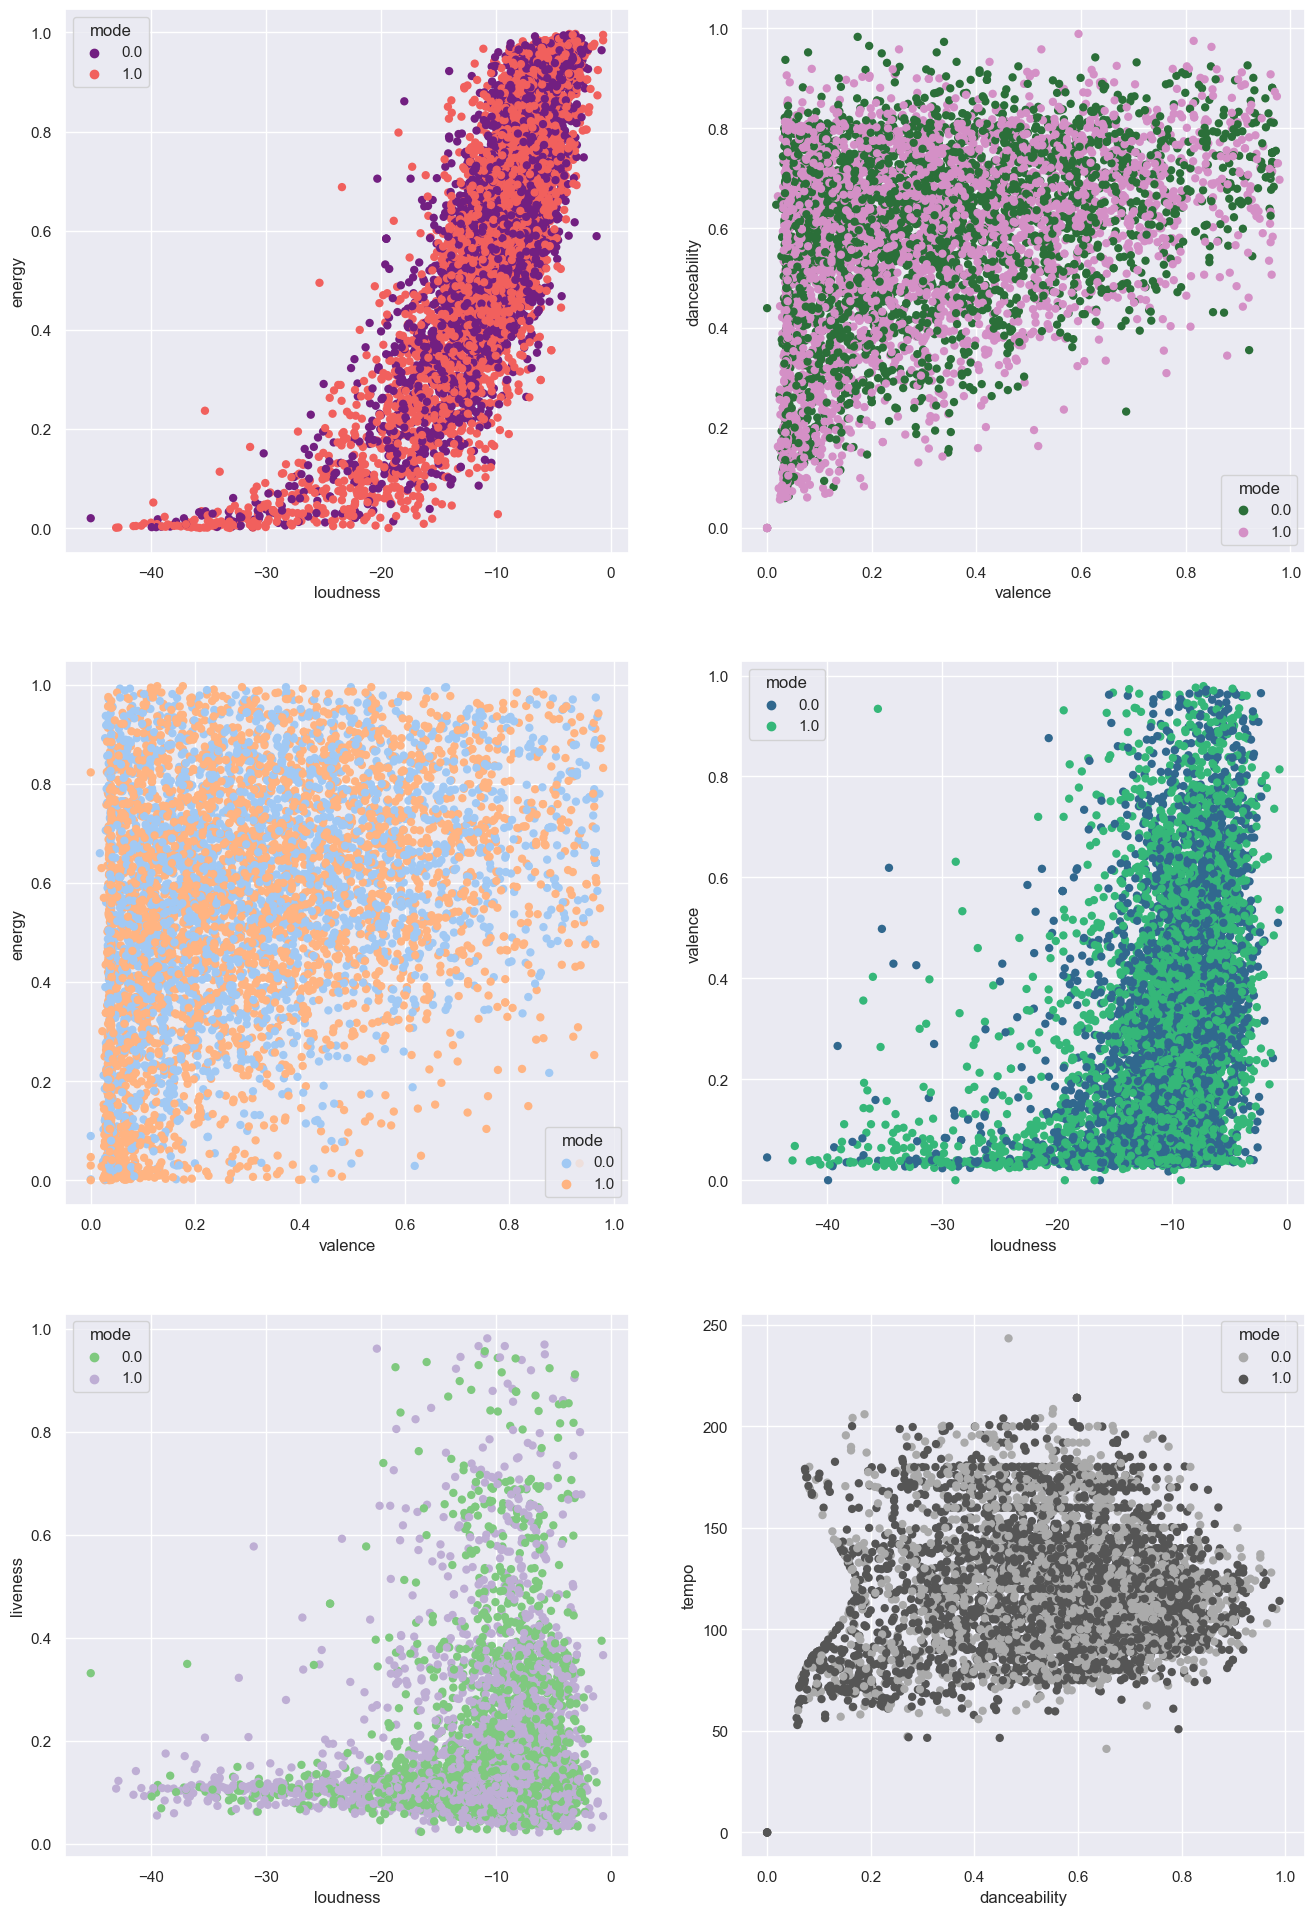

In [34]:
f, ax = plt.subplots(3,2, figsize=(16,24))

sns.scatterplot(x="loudness", y="energy",
                hue="mode", 
                palette="magma",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[0][0])

sns.scatterplot(x="valence", y="danceability",
                hue="mode", 
                palette="cubehelix",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[0][1])

sns.scatterplot(x="valence", y="energy",
                hue="mode", 
                palette="pastel",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[1][0])

sns.scatterplot(x="loudness", y="valence",
                hue="mode", 
                palette="viridis",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[1][1])

sns.scatterplot(x="loudness", y="liveness",
                hue="mode", 
                palette="Accent",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[2][0])

sns.scatterplot(x="danceability", y="tempo",
                hue="mode", 
                palette="binary",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[2][1])

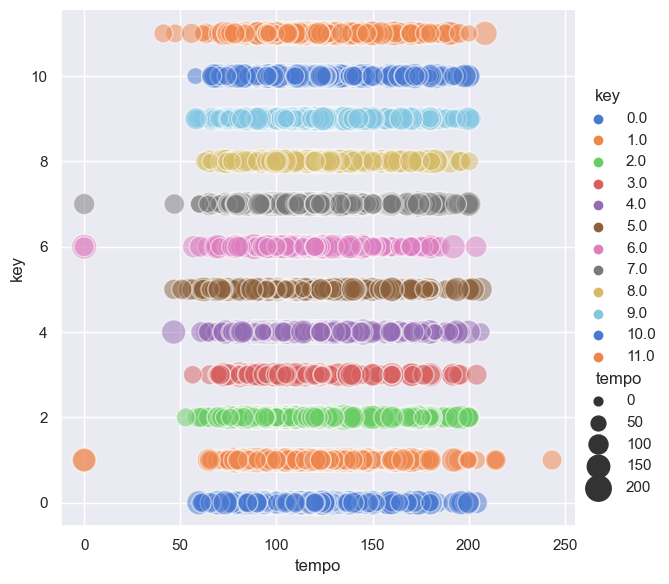

In [35]:
sns.relplot(x="tempo", y="key", hue="key", size=my_streaming['tempo'],
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=distinct_song)

In [36]:
table = pd.pivot_table(distinct_song,index=['artistName'], values = ['key'], aggfunc=np.mean)
table

key
artistName        
((( O )))      3.0
16BL           5.0
2 bucks       11.0
21street       0.0
3 Doors Down  11.0
...            ...
厉书壹            3.0
向井秀徳           5.0
王美柔            9.0
耳鳴り 専門医        5.0
黄百冰           11.0

[2756 rows x 1 columns]

# 3. My Playlists Analysis

In [38]:
df = pd.read_csv('data/mohit_playlist_data.csv')
df.head(3)

Unnamed: 0       list_name                 song_id     song_name  \
0           0  My Playlist #8  1ty518HppLocYdQXEznYDb    Nityananda   
1           1  My Playlist #8  1ty518HppLocYdQXEznYDb    Nityananda   
2           2  My Playlist #8  7yxHmqBrmFPGD3ifItlhCM  Rama Raghava   

          artist  popularity release_date  energy  liveness    tempo  \
0  Shanti People          15   2017-04-18   0.601    0.1180   94.998   
1  Shanti People          15   2017-04-18   0.601    0.1180   94.998   
2  Shanti People           8   2013-10-22   0.729    0.0931  121.020   

   speechiness  acousticness  instrumentalness  danceability  duration_ms  \
0       0.0438        0.0614           0.00000         0.715       420857   
1       0.0438        0.0614           0.00000         0.715       420857   
2       0.0462        0.3880           0.00015         0.726       264000   

   loudness  valence  mode  key  
0    -8.411    0.719     1   10  
1    -8.411    0.719     1   10  
2    -6.328    0.399     0    6

## Comparing different playlists

In [39]:
from math import pi

In [40]:
radar = df.groupby('list_name')[['energy', 'danceability', 'valence', 'liveness', 'acousticness']].aggregate(np.mean)
radar.head(3)

energy  danceability   valence  liveness  \
list_name                                                                
Dalai Lama – Inner World    0.164309      0.368091  0.124227  0.140636   
Deep House Relax 2023       0.696560      0.705340  0.267196  0.183109   
GetReadyWithMohit 09.23.22  0.635467      0.614700  0.455667  0.204167   

                            acousticness  
list_name                                 
Dalai Lama – Inner World        0.911091  
Deep House Relax 2023           0.240043  
GetReadyWithMohit 09.23.22      0.302732

In [41]:
playlist_names = radar.index.to_list()
playlist_names

['Dalai Lama – Inner World',
 'Deep House Relax 2023',
 'GetReadyWithMohit 09.23.22',
 'My Playlist #8',
 'My Shazam Tracks',
 'Sanctuary Of Sounds',
 'Spring_Bees']

## Different features of the Playlists

In [42]:
def plot_radar(idx,color):
  # categories
  category = ['energy', 'danceability', 'valence', 'liveness', 'acousticness']
  N = len(category)

  #values
  values = radar.iloc[idx].to_list()
  values += values[:1]

  # calculate angle for each category
  angles = [n / float(N) * 2 * pi for n in range(N) ]
  angles += angles[:1]

  # plot
  plt.polar(angles, values, marker = '.', color=color)
  plt.fill(angles, values, alpha=0.3, color=color)

  # x labels
  plt.xticks(angles[:-1], category)

  # y labels
  plt.yticks([0.2,0.4,0.6,0.8])
  plt.ylim(0,1)

In [43]:
color = ['crimson', 'teal', 'yellowgreen', 'gold', 'maroon', 'gray', 'lime', 'slateblue', 'chocolate', 'darkcyan']

IndexError: list index out of range

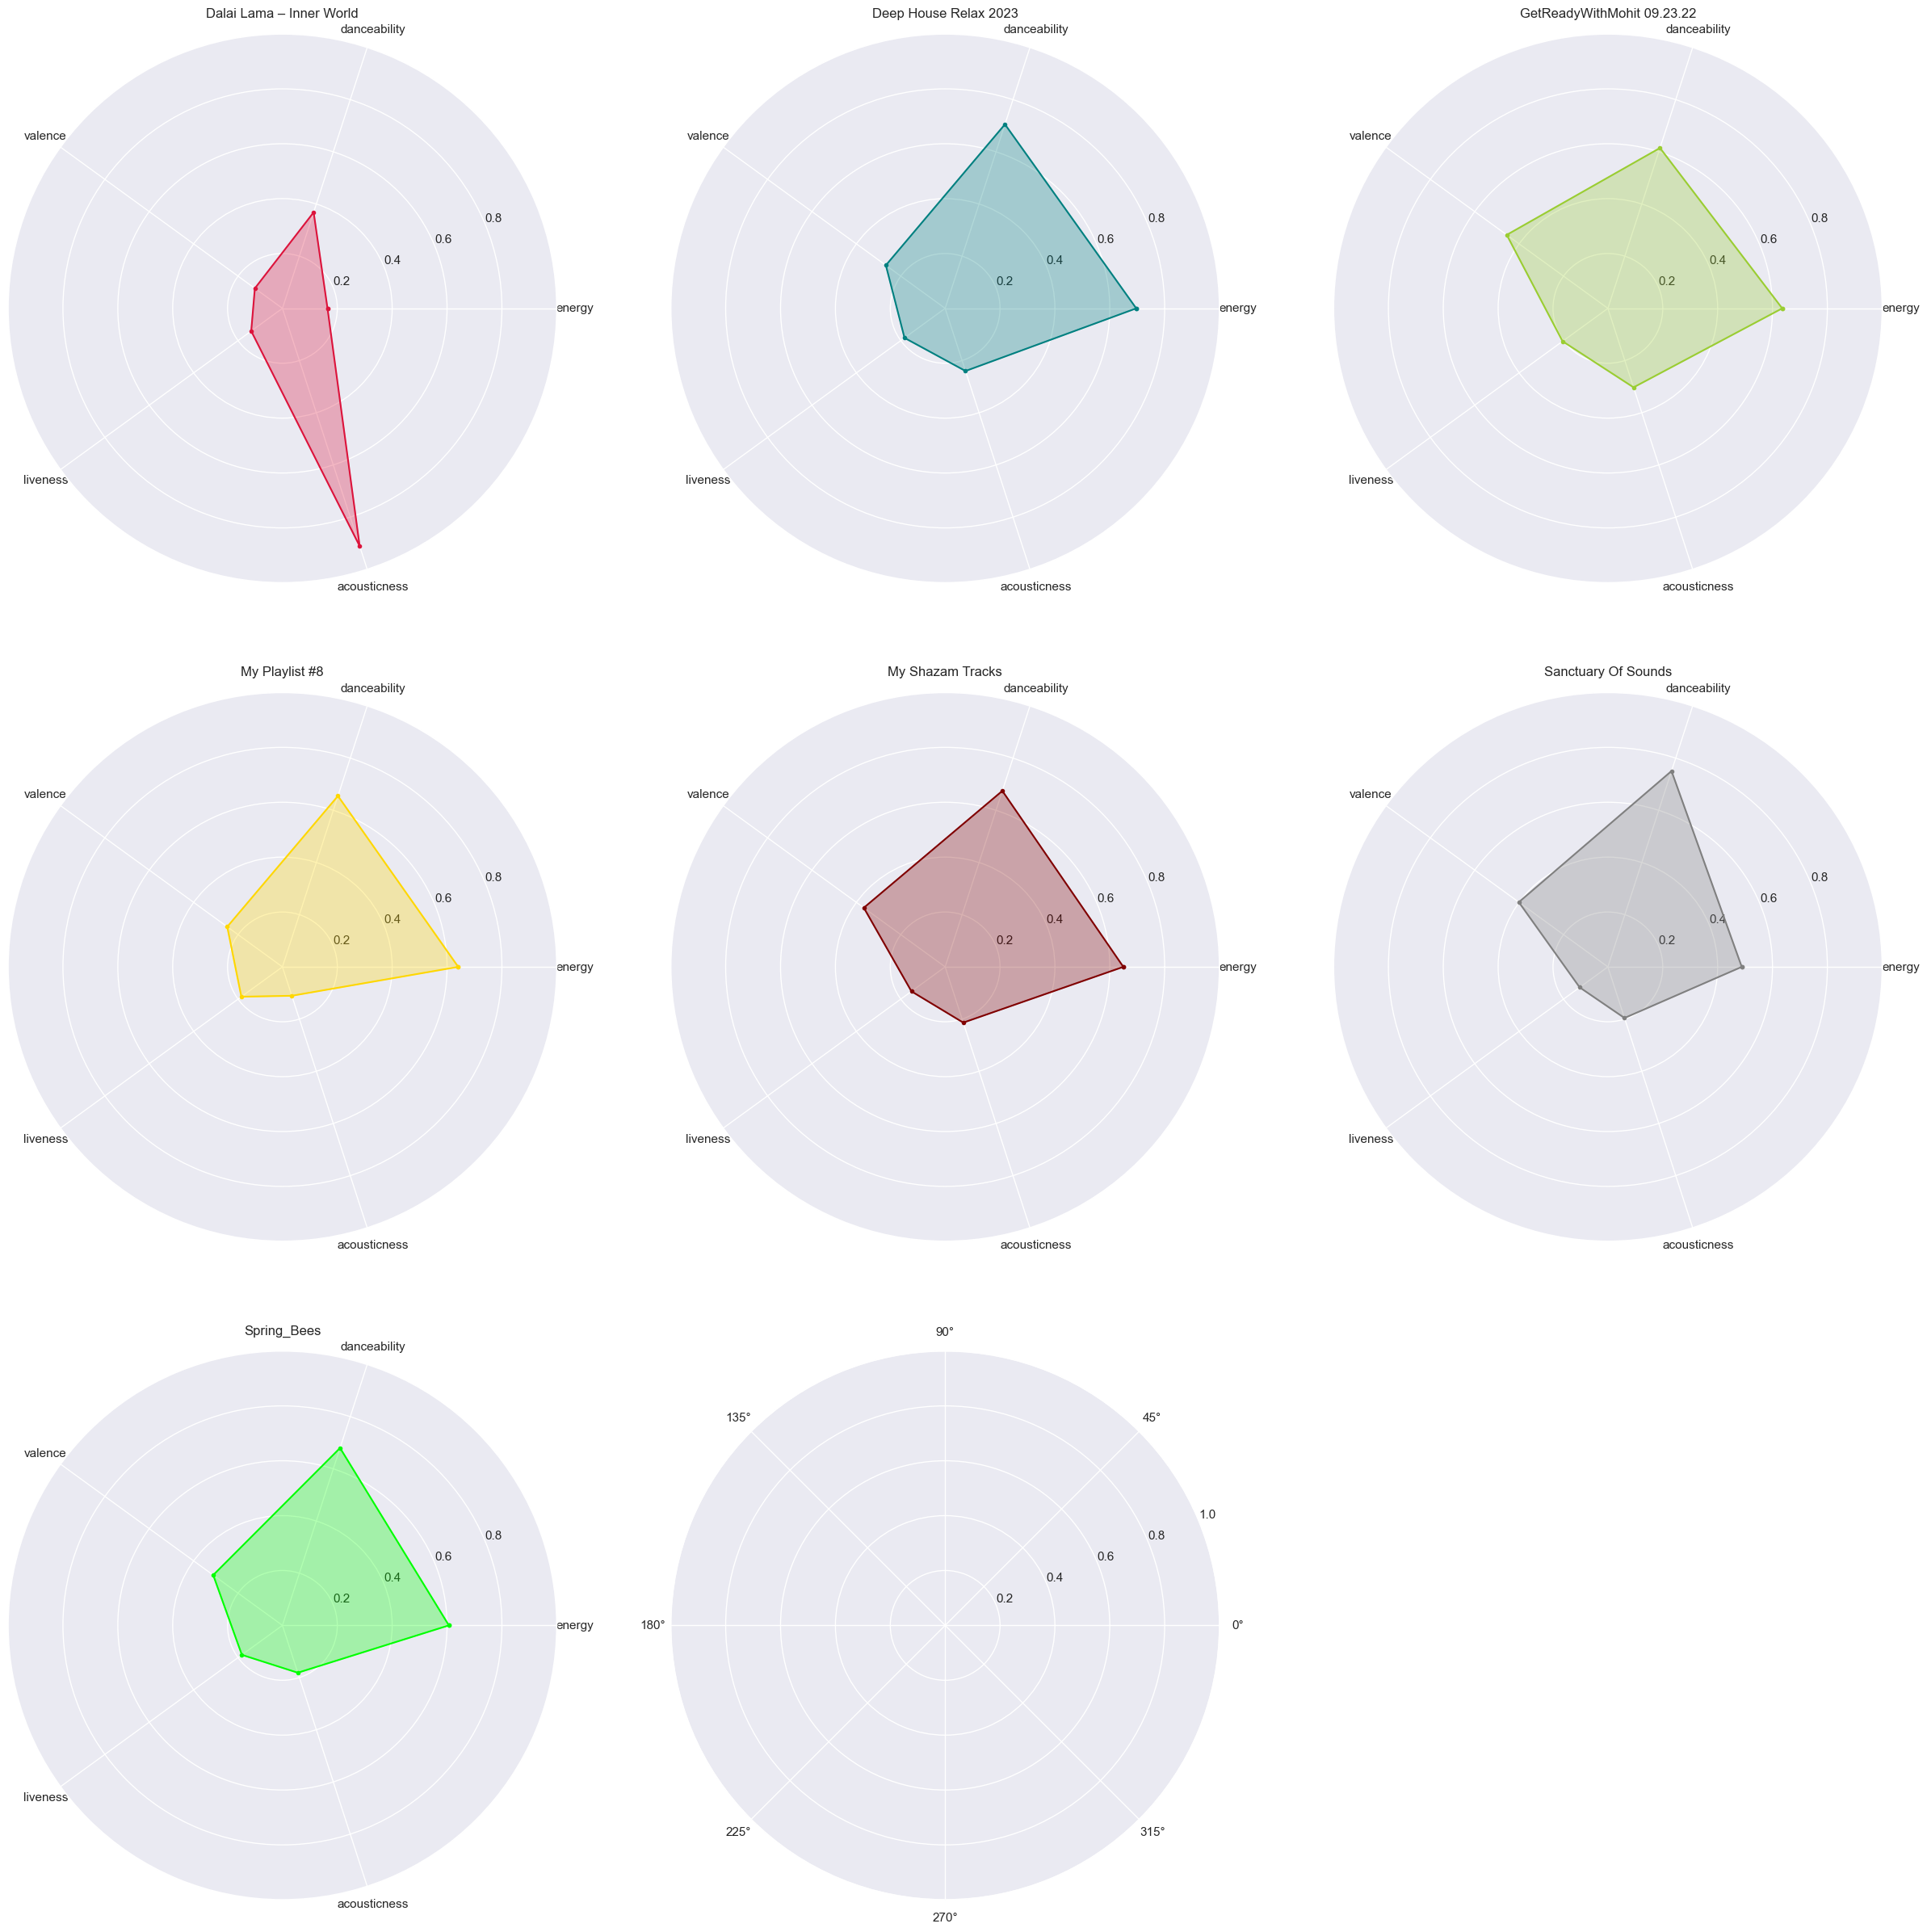

In [44]:
plt.rcParams['figure.figsize'] = (30,30)
for i in range(9):
  k = i+1
  ax = plt.subplot(int('33' + str(k)), polar='True')
  ax.title.set_text(playlist_names[i])
  plot_radar(i,color[i])

plt.show()

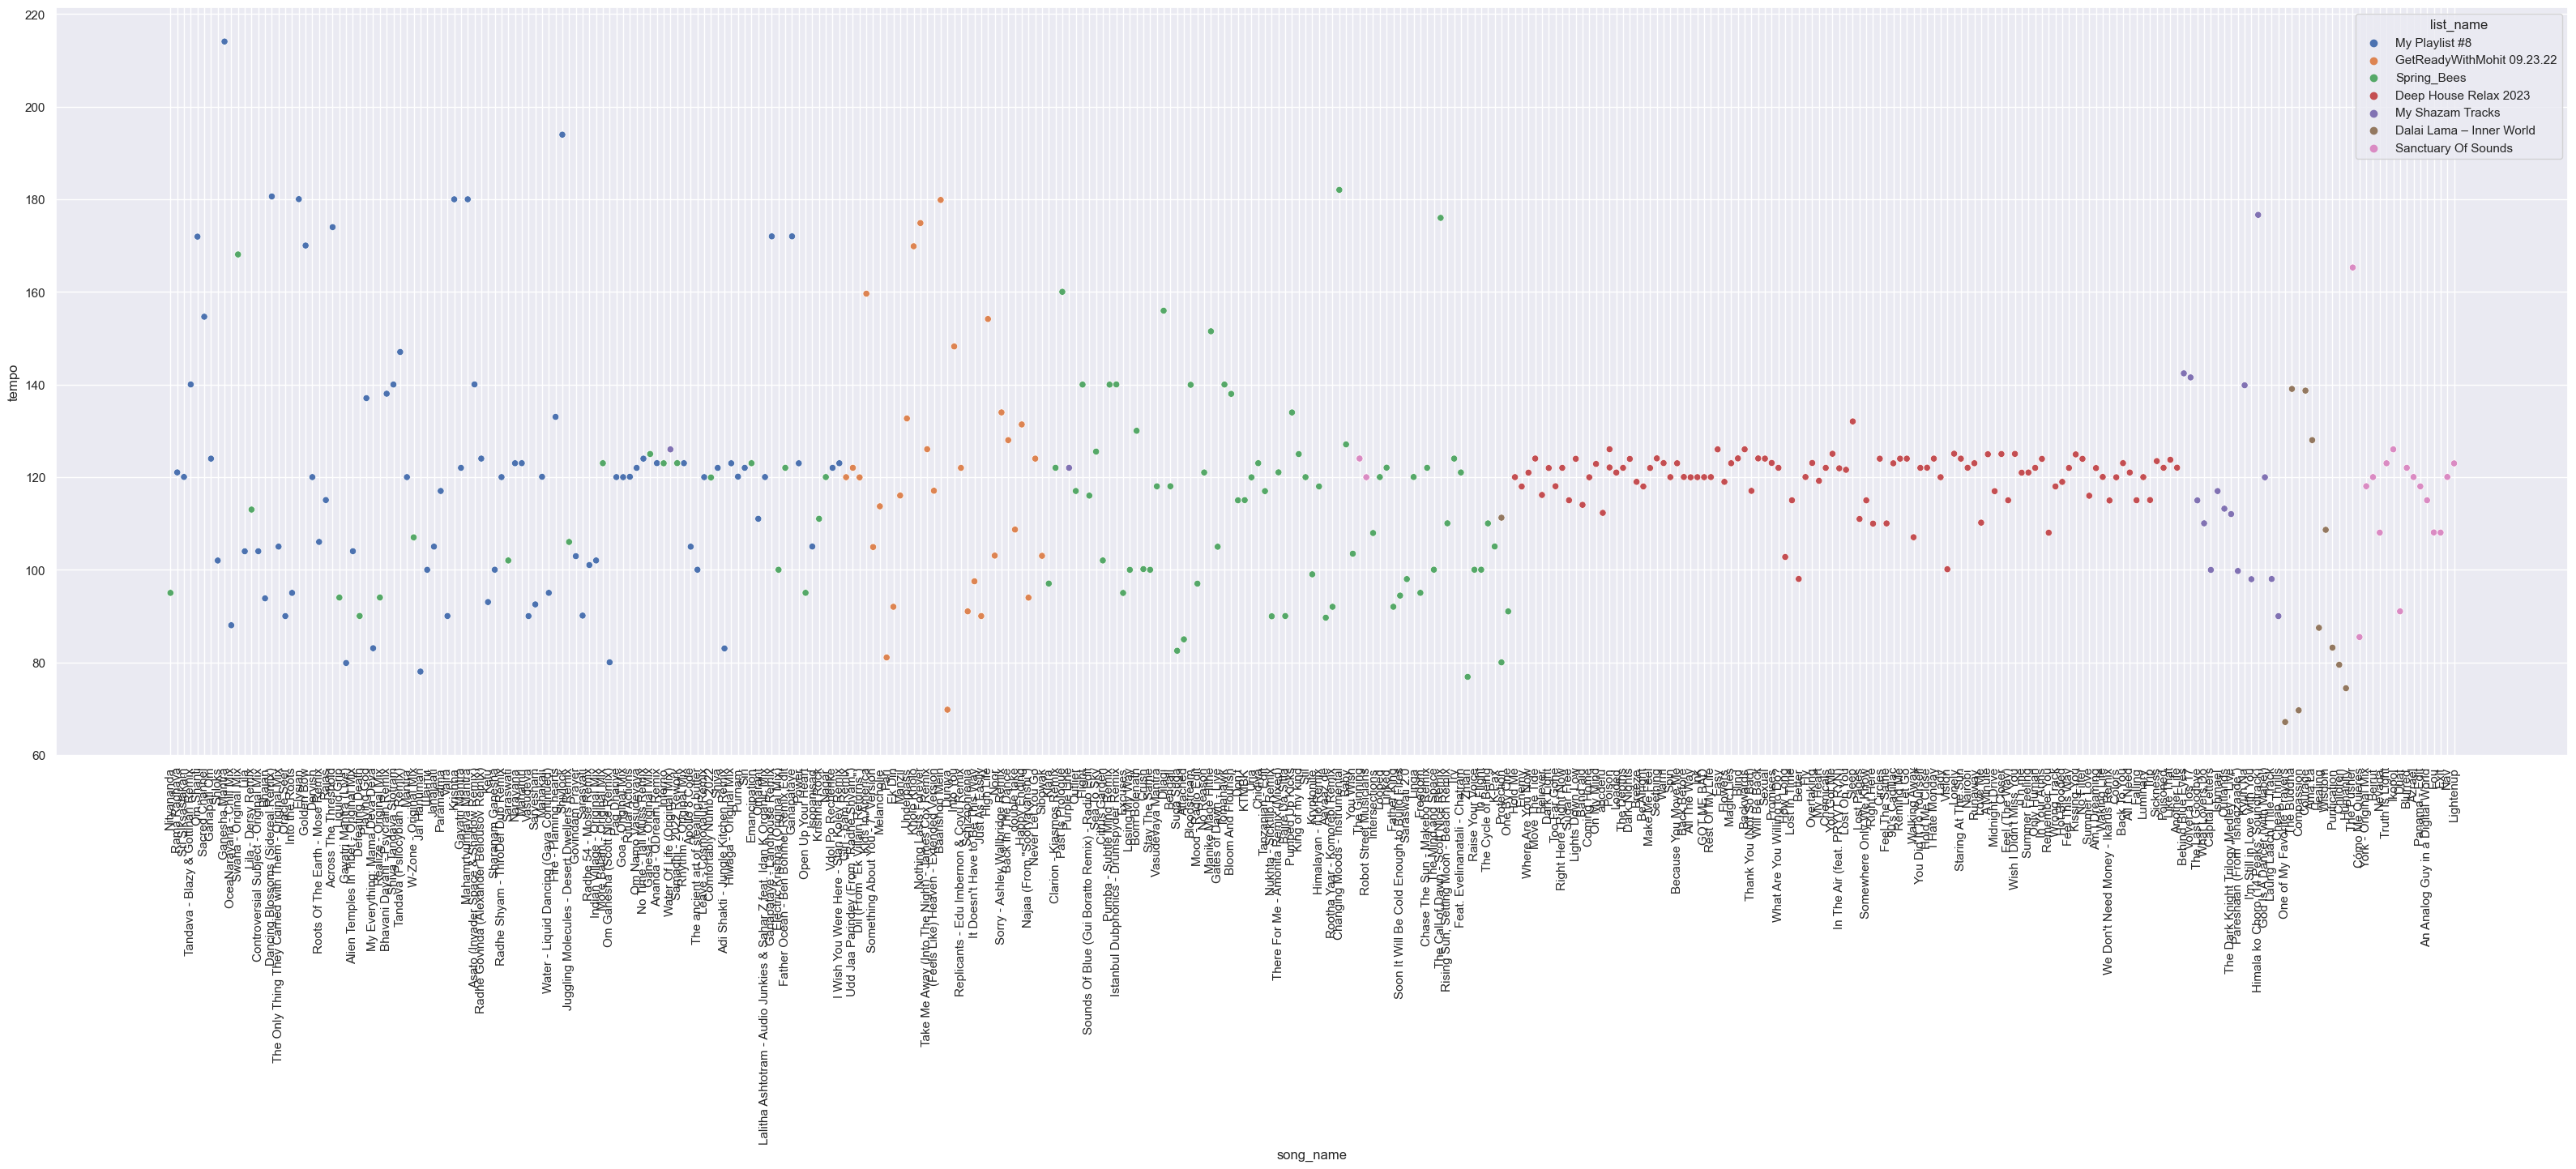

In [45]:
plt.rcParams['figure.figsize'] = (40,12)
sns.scatterplot(data=df, x='song_name', y='tempo', hue='list_name')
plt.xticks(rotation=90)
plt.show()

## Different songs as per year

In [46]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].apply(lambda x: x.year)

ValueError: time data "1992" doesn't match format "%Y-%m-%d", at position 17. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [44]:
idx = pd.DataFrame(range(1971,2020),columns=['Release Year'])

# then merge the idx with df"release_year" that is just created
release_year = pd.merge(idx, df[['song_id', 'year']], how='left',left_on='Release Year',right_on = 'year', copy=False)

release_year.drop("year",inplace=True,axis=1)
release_year.head(3)

Release Year                 song_id
0          1971  1YYhDizHx7PnDhAhko6cDS
1          1972                     NaN
2          1973                     NaN

In [45]:
release_year = release_year.groupby('Release Year', as_index=False)['song_id'].count()
release_year.head(3)

Release Year  song_id
0          1971        1
1          1972        0
2          1973        0

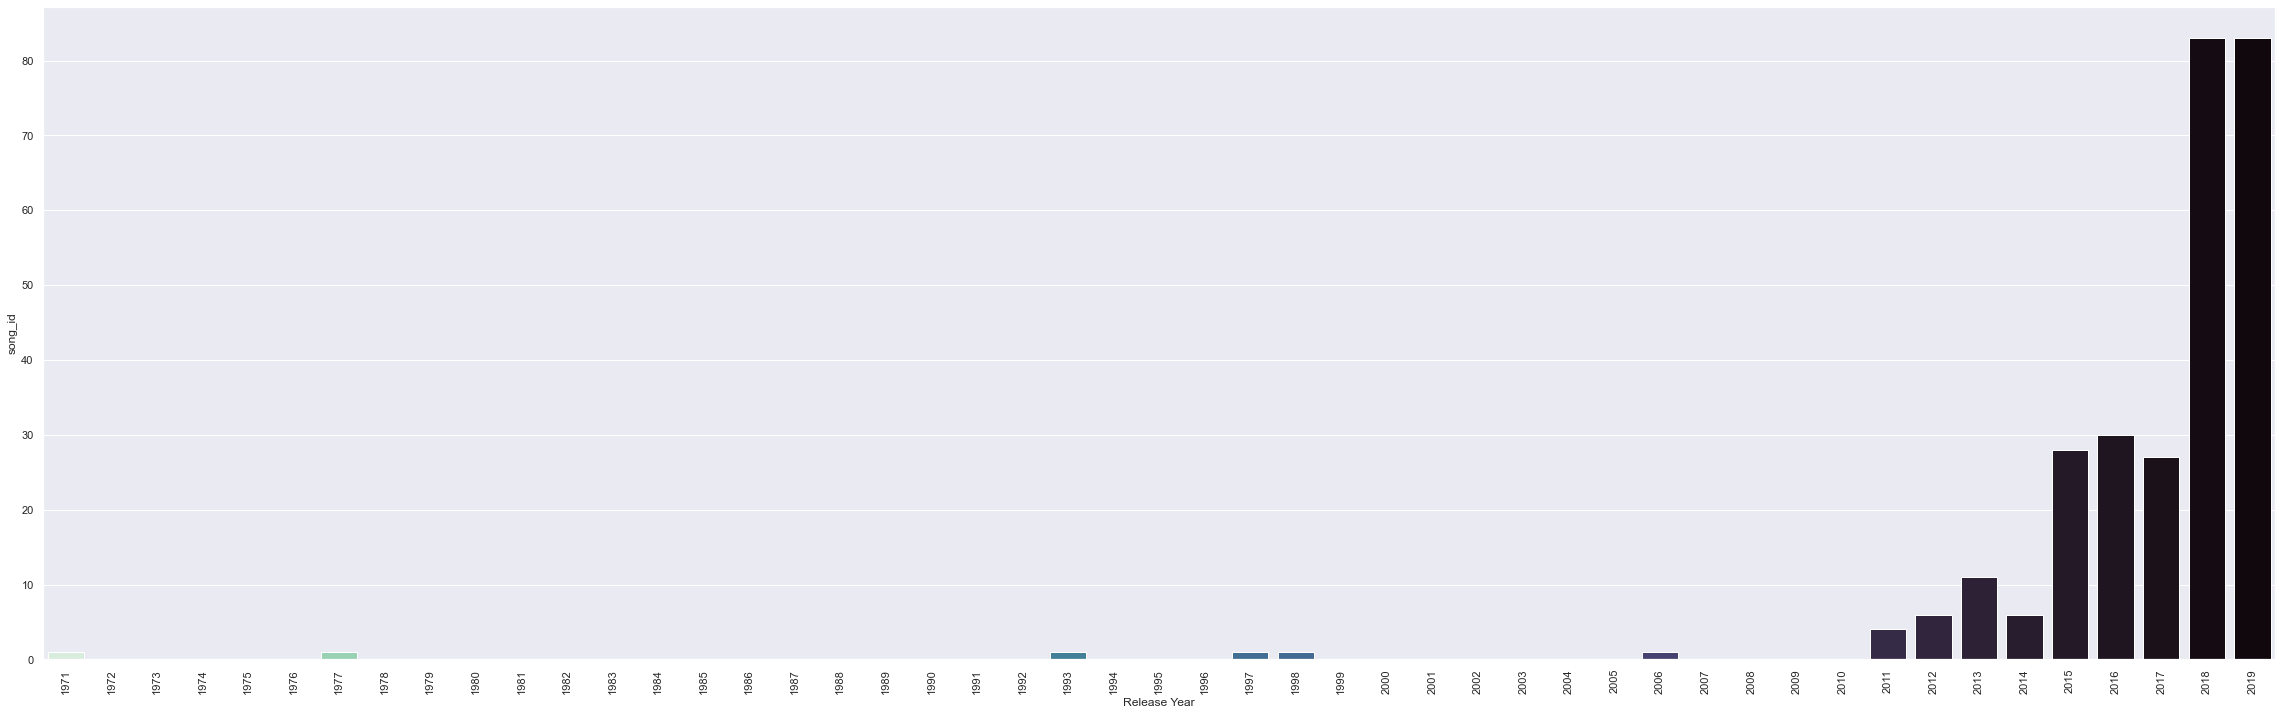

In [46]:
sns.barplot(data=release_year, x='Release Year', y='song_id', palette='mako_r')
plt.xticks(rotation=90)
plt.show()

Most of the songs I listen to are the recent ones

## Count of songs for each modes

In [47]:
key_mode = df.groupby(["key","mode"], as_index=False)["song_id"].count()
key_mode.head(3)

key  mode  song_id
0  0.0   0.0        5
1  0.0   1.0       20
2  1.0   0.0       14

In [48]:
# map the key in number to the real key represented in alphabet
key_dic = {0: "C", 
           1: "C♯/D♭",
           2: "D",
           3: "D♯/E♭",
           4: "E",
           5: "F",
           6: "F♯/G♭",
           7: "G",
           8: "G♯/A♭",
           9: "A",
           10: "A♯/B♭",
           11: "B"}
key_mode = key_mode.replace({"key": key_dic})

C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 9837 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9837 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9837 missing from current font.
  font.set_text(s, 0, flags=flags)


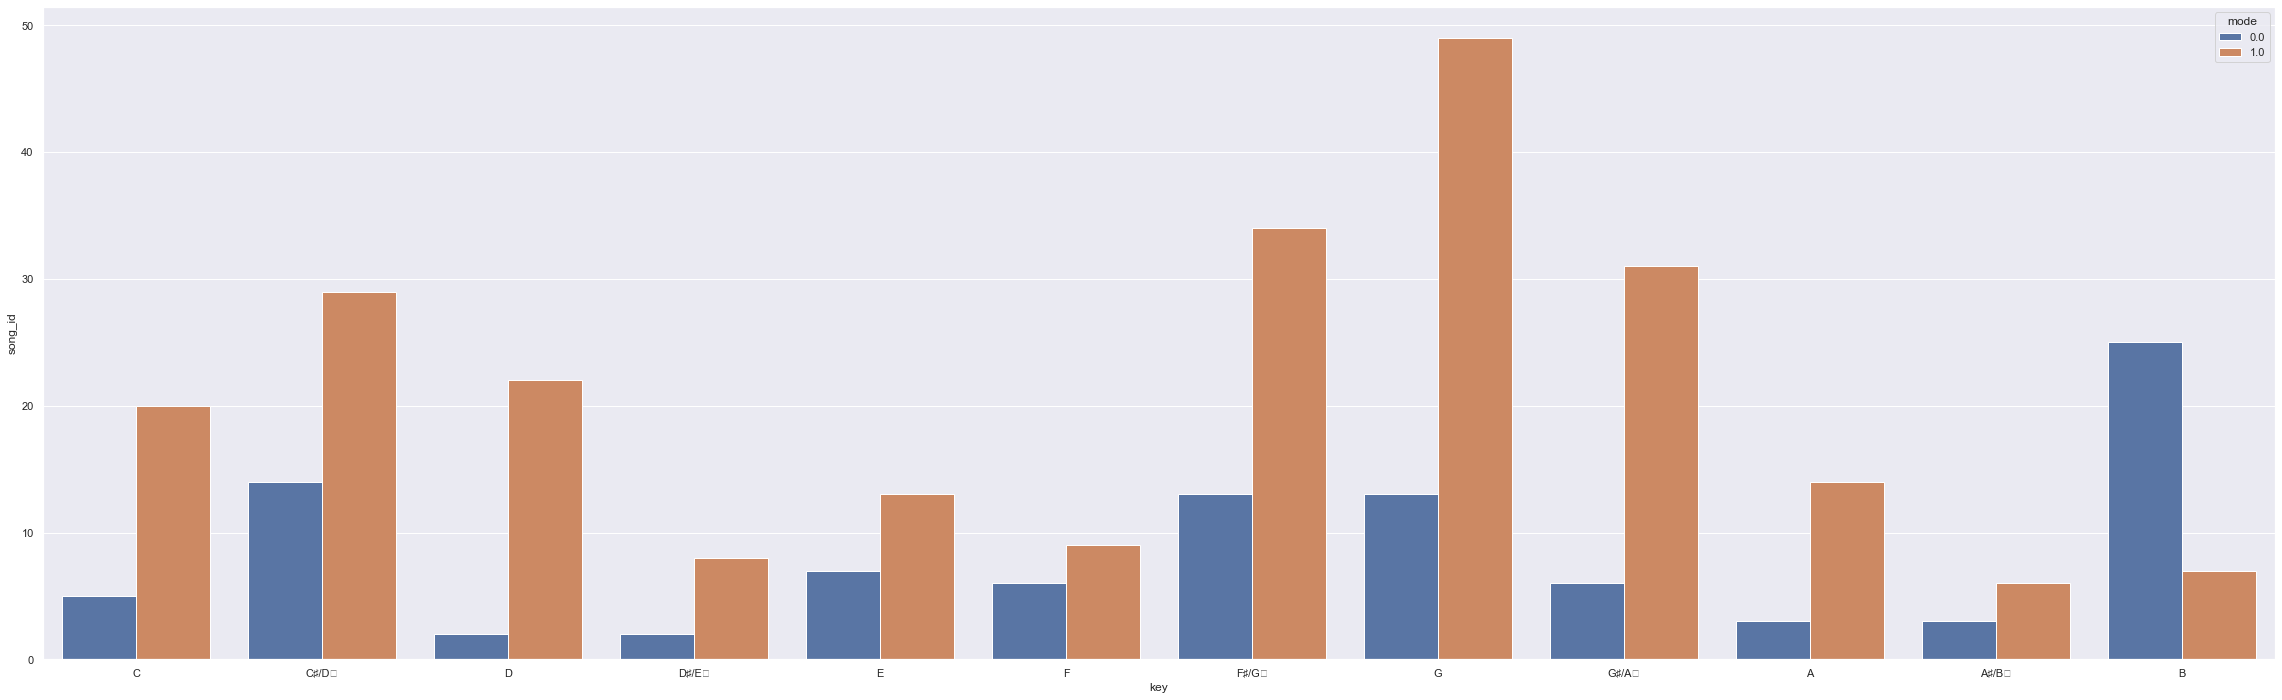

In [49]:
sns.barplot(data=key_mode, x='key', y='song_id', hue='mode')
plt.show()